In [46]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

هذا الملف يحتوي على جميع التجارب المجربة على حل لتوازن البيانات 
بينما هناك ملف اخر بنفس الاسم يحتوي فقط على افضل التجارب المطبقة(منضف) اسمه (imbalancedData_solution_WithOnlyBestModel) 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
dataset =  pd.read_csv("healthcare-dataset-stroke-data.csv")

In [47]:
def plotData(gridspaceX,gridSpaceY,dataset,featureColumnName,hue,continuousOrCategorical):
  fig = plt.figure(figsize=(35,25))
  gs = fig.add_gridspec(3,4)
  gs.update(wspace=0.3, hspace=0.15)
  ax1 = fig.add_subplot(gs[gridspaceX,gridSpaceY])
  background_color = "#AF7880"

  fig.patch.set_facecolor(background_color) 
  ax1.set_facecolor(background_color) 
  ax1.grid(color='#123456', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  if continuousOrCategorical == 0:
    sns.countplot(ax=ax1, data=dataset, x=featureColumnName,palette = 'Purples', hue= hue,edgecolor='black',**{'hatch':'/','linewidth':2})
  elif continuousOrCategorical ==1:
    sns.kdeplot(ax=ax1, data=dataset, x= featureColumnName,hue=hue, fill=True,palette='Purples', alpha=.5, linewidth=0)
  elif continuousOrCategorical ==2:
    sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

هذا الملف يحتوي على جميع التجارب المجربة على حل لتوازن البيانات 
بينما هناك ملف اخر بنفس الاسم يحتوي فقط على افضل التجارب المطبقة(منضف) 

In [23]:
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].median())

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
def encoding(dataset,column_name):
  label_encoder = LabelEncoder()
  return label_encoder.fit_transform(dataset[column_name])

In [25]:
dataset.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [26]:
dataset = dataset.drop('id',axis =1)

In [27]:
datasetWithOnehatEncoding = dataset.copy()

In [28]:
def toOneHatEncoder(columnName):
  onehatencoder = OneHotEncoder()
  work_type = onehatencoder.fit_transform(datasetWithOnehatEncoding[[columnName]])
  return onehatencoder,work_type.toarray()

In [29]:
ohe , work_type = toOneHatEncoder('work_type')
datasetWithOnehatEncoding[ohe.categories_[0]] = work_type
datasetWithOnehatEncoding.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Govt_job  \
0          Urban             228.69  36.6  formerly smoked       1       0.0   
1          Rural             202.21  28.1     never smoked       1       0.0   
2          Rural             105.92  32.5     never smoked       1       0.0   
3          Urban             171.23  34.4           smokes       1       0.0   
4          Rural             174.12  24.0     never smoked       1       0.0   

   Never_worked  Private  Self-employed  children  
0           0.0      1.0            0.0       0.0  
1           0.0      0.0            1.0       0.0  
2           0.0      1.0            0.0       0.0  
3           0.0      1.0            0.0       0.0  
4           0.0      0.0            1.0       0.0

In [30]:
ohe , smoking_status = toOneHatEncoder('smoking_status')
datasetWithOnehatEncoding[ohe.categories_[0]] = smoking_status
datasetWithOnehatEncoding.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Govt_job  \
0          Urban             228.69  36.6  formerly smoked       1       0.0   
1          Rural             202.21  28.1     never smoked       1       0.0   
2          Rural             105.92  32.5     never smoked       1       0.0   
3          Urban             171.23  34.4           smokes       1       0.0   
4          Rural             174.12  24.0     never smoked       1       0.0   

   Never_worked  Private  Self-employed  children  Unknown  formerly smoked  \
0           0.0      1.0            0.0       0.0      0.0              1.0   
1           0.0      0.0            1.0       0.0      0.0              0.0   
2           0.0      1.0            0.0       0.0      0.0              0.0   
3           0.0      1.0            0.0       0.0      0.0              0.0   
4           0.0      0.0            1.0       0.0      0.0              0.0   

   never smoked  smokes  
0           0.0     0.0  
1           1.0     0.0  
2           1.0     0.0  
3           0.0     1.0  
4           1.0     0.0

In [31]:
ohe , gender = toOneHatEncoder('gender')
datasetWithOnehatEncoding[ohe.categories_[0]] = gender
datasetWithOnehatEncoding.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  ...  Private  \
0          Urban             228.69  36.6  formerly smoked  ...      1.0   
1          Rural             202.21  28.1     never smoked  ...      0.0   
2          Rural             105.92  32.5     never smoked  ...      1.0   
3          Urban             171.23  34.4           smokes  ...      1.0   
4          Rural             174.12  24.0     never smoked  ...      0.0   

   Self-employed  children  Unknown  formerly smoked  never smoked  smokes  \
0            0.0       0.0      0.0              1.0           0.0     0.0   
1            1.0       0.0      0.0              0.0           1.0     0.0   
2            0.0       0.0      0.0              0.0           1.0     0.0   
3            0.0       0.0      0.0              0.0           0.0     1.0   
4            1.0       0.0      0.0              0.0           1.0     0.0   

   Female  Male  Other  
0     0.0   1.0    0.0  
1     1.0   0.0    0.0  
2     0.0   1.0    0.0  
3     1.0   0.0    0.0  
4     1.0   0.0    0.0  

[5 rows x 23 columns]

In [32]:
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('smoking_status',axis=1)
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('gender',axis=1)
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('work_type',axis=1)
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('Other',axis=1)

In [33]:
datasetWithOnehatEncoding.head()

age  hypertension  heart_disease ever_married Residence_type  \
0  67.0             0              1          Yes          Urban   
1  61.0             0              0          Yes          Rural   
2  80.0             0              1          Yes          Rural   
3  49.0             0              0          Yes          Urban   
4  79.0             1              0          Yes          Rural   

   avg_glucose_level   bmi  stroke  Govt_job  Never_worked  Private  \
0             228.69  36.6       1       0.0           0.0      1.0   
1             202.21  28.1       1       0.0           0.0      0.0   
2             105.92  32.5       1       0.0           0.0      1.0   
3             171.23  34.4       1       0.0           0.0      1.0   
4             174.12  24.0       1       0.0           0.0      0.0   

   Self-employed  children  Unknown  formerly smoked  never smoked  smokes  \
0            0.0       0.0      0.0              1.0           0.0     0.0   
1            1.0       0.0      0.0              0.0           1.0     0.0   
2            0.0       0.0      0.0              0.0           1.0     0.0   
3            0.0       0.0      0.0              0.0           0.0     1.0   
4            1.0       0.0      0.0              0.0           1.0     0.0   

   Female  Male  
0     0.0   1.0  
1     1.0   0.0  
2     0.0   1.0  
3     1.0   0.0  
4     1.0   0.0

In [34]:
datasetWithOnehatEncoding['ever_married'] = encoding(datasetWithOnehatEncoding,'ever_married')
datasetWithOnehatEncoding['Residence_type'] = encoding(datasetWithOnehatEncoding,'Residence_type')

In [35]:
def normalize(value, old_max, old_min, new_max=1, new_min=0):
    old_range = (old_max - old_min)  
    new_range = (new_max - new_min)  
    return (((value - old_min) * new_range) / old_range) + new_min

In [36]:
data = datasetWithOnehatEncoding.copy()
data = data[data['age']>1]
print(data.shape)

maxAge = data['age'].max()
minAge = data['age'].min()
data['age'] = data['age'].apply(lambda x: normalize(x,maxAge, minAge))

maxGlu = data['avg_glucose_level'].max()
minGlu = data['avg_glucose_level'].min()
data['avg_glucose_level'] = data['avg_glucose_level'].apply(lambda x: normalize(x,maxGlu, minGlu))

maxBmi = data['bmi'].max()
minBmi = data['bmi'].min()
data['bmi'] = data['bmi'].apply(lambda x: normalize(x,maxBmi, minBmi))

datasetWithOnehatEncoding = data
datasetWithOnehatEncoding

(5062, 19)


age  hypertension  heart_disease  ever_married  Residence_type  \
0     0.814632             0              1             1               1   
1     0.740484             0              0             1               0   
2     0.975284             0              1             1               0   
3     0.592190             0              0             1               1   
4     0.962926             1              0             1               0   
...        ...           ...            ...           ...             ...   
5105  0.975284             1              0             1               1   
5106  0.987642             0              0             1               1   
5107  0.419179             0              0             1               0   
5108  0.616906             0              0             1               0   
5109  0.530400             0              0             1               1   

      avg_glucose_level       bmi  stroke  Govt_job  Never_worked  Private  \
0              0.801265  0.301260       1       0.0           0.0      1.0   
1              0.679023  0.203895       1       0.0           0.0      0.0   
2              0.234512  0.254296       1       0.0           0.0      1.0   
3              0.536008  0.276060       1       0.0           0.0      1.0   
4              0.549349  0.156930       1       0.0           0.0      0.0   
...                 ...       ...     ...       ...           ...      ...   
5105           0.132167  0.203895       0       0.0           0.0      1.0   
5106           0.323516  0.340206       0       0.0           0.0      0.0   
5107           0.128658  0.232532       0       0.0           0.0      0.0   
5108           0.513203  0.175258       0       0.0           0.0      1.0   
5109           0.139230  0.182131       0       1.0           0.0      0.0   

      Self-employed  children  Unknown  formerly smoked  never smoked  smokes  \
0               0.0       0.0      0.0              1.0           0.0     0.0   
1               1.0       0.0      0.0              0.0           1.0     0.0   
2               0.0       0.0      0.0              0.0           1.0     0.0   
3               0.0       0.0      0.0              0.0           0.0     1.0   
4               1.0       0.0      0.0              0.0           1.0     0.0   
...             ...       ...      ...              ...           ...     ...   
5105            0.0       0.0      0.0              0.0           1.0     0.0   
5106            1.0       0.0      0.0              0.0           1.0     0.0   
5107            1.0       0.0      0.0              0.0           1.0     0.0   
5108            0.0       0.0      0.0              1.0           0.0     0.0   
5109            0.0       0.0      1.0              0.0           0.0     0.0   

      Female  Male  
0        0.0   1.0  
1        1.0   0.0  
2        0.0   1.0  
3        1.0   0.0  
4        1.0   0.0  
...      ...   ...  
5105     1.0   0.0  
5106     1.0   0.0  
5107     1.0   0.0  
5108     0.0   1.0  
5109     1.0   0.0  

[5062 rows x 19 columns]

In [37]:
rowsWithOnes = datasetWithOnehatEncoding.loc[datasetWithOnehatEncoding['stroke'] == 1]

In [38]:
dfcopy = datasetWithOnehatEncoding.copy()

In [39]:
for i in range(0,18):
  dfcopy = dfcopy.append(rowsWithOnes, ignore_index = True)

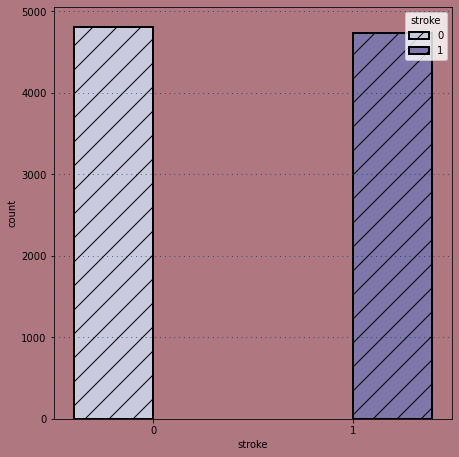

In [48]:
plotData(0,1,dfcopy,'stroke','stroke',0)

In [49]:

# input_oneHatEn = datasetWithOnehatEncoding.drop('stroke',axis =1)
# output_oneHatEn  = datasetWithOnehatEncoding['stroke']
# input_oneHatEn  = np.asarray(input_oneHatEn)
# output_oneHatEn = np.asarray(output_oneHatEn)

input_oneHatEn = dfcopy.drop('stroke',axis =1)
output_oneHatEn  = dfcopy['stroke']
input_oneHatEn  = np.asarray(input_oneHatEn)
output_oneHatEn = np.asarray(output_oneHatEn)

In [50]:
from sklearn.model_selection import train_test_split
x_train_copy,x_test_copy,y_train_copy,y_test_copy = train_test_split(input_oneHatEn,output_oneHatEn,random_state=0)

In [51]:
print(f'x_train', x_train_copy.shape)
print(f'y_train',y_train_copy.shape)
print(f'x_test',x_test_copy.shape)
print(f'y_test',y_test_copy.shape)

x_train (7158, 18)
y_train (7158,)
x_test (2386, 18)
y_test (2386,)


In [52]:
def scale(scale_type,x_train,x_test):
  scaler = scale_type
  scaler.fit(x_train)
  x_train_scaled = scaler.transform(x_train)
  x_test_scaled = scaler.transform(x_test)
  print("X_train.shape: {}".format(x_train_scaled.shape))
  print("X_train_scaled.shape: {}".format(x_train_scaled.shape))
  return x_train_scaled ,x_test_scaled

def selectionFeature(select_type,x_train,y_train,x_test):
  select = select_type
  select.fit(x_train, y_train)
  x_train_selected = select.transform(x_train)
  x_test_selected = select.transform(x_test)
  print("X_train.shape: {}".format(x_train.shape))
  print("X_train_selected.shape: {}".format(x_train_selected.shape))
  return x_train_selected,x_test_selected

from sklearn.feature_selection import RFE
def rfe(x_train,y_train,x_test,numberOfFeatures):
  select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=numberOfFeatures)
  select.fit(x_train, y_train)
  x_train_selected = select.transform(x_train)
  x_test_selected = select.transform(x_test)
  print("X_train.shape: {}".format(x_train.shape))
  print("X_train_selected.shape: {}".format(x_train_selected.shape))
  return x_train_selected,x_test_selected

def pca(n_components,x_train,x_test):
  p_c_a = PCA(n_components)
  p_c_a.fit(x_train)
  x_train_pca = p_c_a.transform(x_train)
  x_test_pca = p_c_a.transform(x_test)
  print("X_train.shape: {}".format(x_train.shape))
  print("X_train_pca.shape: {}".format(x_train_pca.shape))
  return x_train_pca,x_test_pca

In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [54]:
from sklearn.decomposition import PCA

In [55]:
x_train_pca,x_test_pca = pca(10,x_train_copy,x_test_copy)

X_train.shape: (7158, 18)
X_train_pca.shape: (7158, 10)


In [56]:
x_train_scaled_standard,x_test_scaled_standard = scale(StandardScaler(),x_train_copy,x_test_copy)
x_train_scaled_MinMax,x_test_scaled_MinMax = scale(MinMaxScaler(),x_train_copy,x_test_copy)
x_train_scaled_Robust,x_test_scaled_Robust = scale(RobustScaler(),x_train_copy,x_test_copy)
x_train_selected_percentile,x_test_selected_percentile = selectionFeature(SelectPercentile(percentile=50),x_train_copy,y_train_copy,x_test_copy)
x_train_selected_KBest,x_test_selected_KBest = selectionFeature(SelectKBest(chi2,k=9),x_train_copy,y_train_copy,x_test_copy)
x_train_selected_GenericUnivariate,x_test_selected_GenericUnivariate = selectionFeature(GenericUnivariateSelect(chi2, mode='k_best', param=10),x_train_copy,y_train_copy,x_test_copy)
x_train_selected_RandomForest,x_test_selected_RandomForest = selectionFeature(SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"),x_train_copy,y_train_copy,x_test_copy)
x_train_selected_RFE ,x_test_selected_RFE = rfe(x_train_copy,y_train_copy,x_test_copy,10)

X_train.shape: (7158, 18)
X_train_scaled.shape: (7158, 18)
X_train.shape: (7158, 18)
X_train_scaled.shape: (7158, 18)
X_train.shape: (7158, 18)
X_train_scaled.shape: (7158, 18)
X_train.shape: (7158, 18)
X_train_selected.shape: (7158, 9)
X_train.shape: (7158, 18)
X_train_selected.shape: (7158, 9)
X_train.shape: (7158, 18)
X_train_selected.shape: (7158, 10)
X_train.shape: (7158, 18)
X_train_selected.shape: (7158, 9)
X_train.shape: (7158, 18)
X_train_selected.shape: (7158, 10)


In [ ]:
def modelsWithoutCurves(modelName , defintionTheModelAndHisParameter,x_train,y_train,x_test,y_test):
  classifier = defintionTheModelAndHisParameter.fit(x_train,y_train)
  y_predicted = classifier.predict(x_test)
  confusionMatrixForTheClassifier = confusion_matrix(y_test,y_predicted )
  precision = precision_score(y_test,y_predicted)
  recall = recall_score(y_test,y_predicted)
  scoreOnTest = classifier.score(x_test,y_test)
  scoreOnTrain =classifier.score(x_train,y_train)
  classificationReportForTheClassifier =classification_report(y_test, y_predicted)
  print(modelName)
  print("score on train data with", modelName," :", scoreOnTrain)
  print("---------------------------------------------------------------------------------------")
  print("score on test data with ", modelName," :",scoreOnTest)
  print("---------------------------------------------------------------------------------------")
  print("preceision: ", precision)
  print("---------------------------------------------------------------------------------------")
  print("recall: ",recall)
  print("---------------------------------------------------------------------------------------")
  print("Most frequent class (",modelName,")\n")
  print_cm(confusionMatrixForTheClassifier, ['Not one', 'One'])
  print("---------------------------------------------------------------------------------------")
  print("classification report:\n",confusionMatrixForTheClassifier)

In [ ]:
for i in range (6,18):
    print(i)
     x_train_selected_KBest,x_test_selected_KBest = selectionFeature(SelectKBest(chi2,k=i),x_train_copy,y_train_copy,x_test_copy)
#     modelsWithoutCurves('DummyClassifier-Smote',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
#     models('logistic regression-Smote',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
#     models('knn-Smote',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
#     models('guassianNB-Smote',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
#     models('support vector machine-Smote',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3,5,7])
#     models('DecisionTree Classifier-Smote',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
     modelsWithoutCurves('RandomForestClassifier',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
#     models('AdaBoostClassifier-Smote',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100,150])

In [57]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [59]:
results = pd.DataFrame(columns = ['Model','Train_Score',"Test_Score","Precision","Recall","Auc","F1"])

In [60]:
def models(modelName , defintionTheModelAndHisParameter,x_train,y_train,x_test,y_test,model,parameter,pRange,results = results):
    classifier = defintionTheModelAndHisParameter.fit(x_train,y_train)
    y_predicted = classifier.predict(x_test)
    confusionMatrixForTheClassifier = confusion_matrix(y_test,y_predicted )
    precision = precision_score(y_test,y_predicted)
    recall = recall_score(y_test,y_predicted)
    scoreOnTest = classifier.score(x_test,y_test)
    scoreOnTrain =classifier.score(x_train,y_train)
    classificationReportForTheClassifier =classification_report(y_test, y_predicted)
    auc1 = roc_auc_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    print(modelName)
    print("score on train data with", modelName," :", scoreOnTrain)
    print("---------------------------------------------------------------------------------------")
    print("score on test data with ", modelName," :",scoreOnTest)
    print("---------------------------------------------------------------------------------------")
    print("preceision: ", precision)
    print("---------------------------------------------------------------------------------------")
    print("recall: ",recall)
    print("---------------------------------------------------------------------------------------")
    print("Most frequent class (",modelName,")\n")
    print_cm(confusionMatrixForTheClassifier, ['Not one', 'One'])
    print("---------------------------------------------------------------------------------------")
    print("classification report:\n",confusionMatrixForTheClassifier)
    print("---------------------------------------------------------------------------------------")
    print('Test set AUC: ', auc1)
    print("---------------------------------------------------------------------------------------")
    print('F1: ',f1)
    ####Learning curve
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    N, train_lc, val_lc = learning_curve(defintionTheModelAndHisParameter,
                                         x_train, y_train, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[0].set_ylim((0, 1))
    ax[0].set_xlim((N[0], N[-1]))
    ax[0].set_xlabel('training size')
    ax[0].set_ylabel('score')
    ax[0].set_title('Leaning curve')
    ax[0].legend(loc='best')
    ######    Validation curve
    name = parameter
    print(name)
    train_score, val_score = validation_curve(model, x_train, y_train,
                                          param_name= name ,
                                          param_range = pRange,
                                          cv=7)
    ax[1].plot(pRange, np.median(train_score, 1), color='blue', label='training score')
    ax[1].plot(pRange, np.median(val_score, 1), color='red', label='validation score')
    ax[1].legend(loc='best')
    ax[1].set_ylim(0, 1)
    ax[1].set_xlabel('pRange')
    ax[1].set_ylabel('score')
  ### auc 
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predicted)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.05])
    plt.plot(fpr_lr, tpr_lr, lw=2, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.show()



    i = results.shape[0]
    results.loc[i,'Model'] = modelName
    results.loc[i,'Train_Score'] = scoreOnTrain
    results.loc[i,"Test_Score"] = scoreOnTest
    results.loc[i,"Precision"] = precision
    results.loc[i,'Recall'] = recall
    results.loc[i,'Auc'] = auc1
    results.loc[i,'F1'] = f1
    

Without scaler and pca and feature selection and tuning


DummyClassifier-Smote
score on train data with DummyClassifier-Smote  : 0.507264599050014
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-Smote  : 0.4953897736797988
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-Smote )

            Not one     One 
    Not one  1182.0     0.0 
        One  1204.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1182    0]
 [1204    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
-------------------------------------------------------------------------------

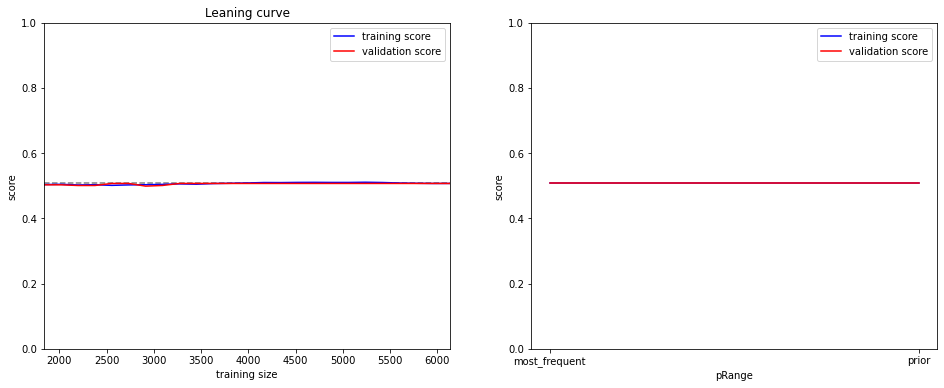

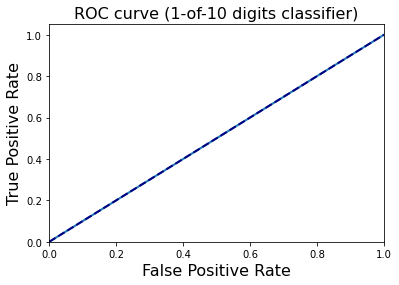

logistic regression-Smote
score on train data with logistic regression-Smote  : 0.7693489801620564
---------------------------------------------------------------------------------------
score on test data with  logistic regression-Smote  : 0.7761944677284157
---------------------------------------------------------------------------------------
preceision:  0.7629513343799058
---------------------------------------------------------------------------------------
recall:  0.8073089700996677
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-Smote )

            Not one     One 
    Not one   880.0   302.0 
        One   232.0   972.0 
---------------------------------------------------------------------------------------
classification report:
 [[880 302]
 [232 972]]
---------------------------------------------------------------------------------------
Test set AUC:  0.7759049080616781
---------------------

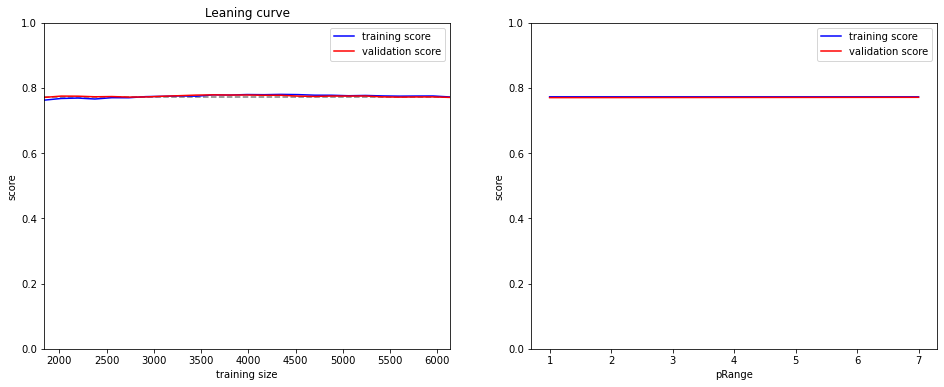

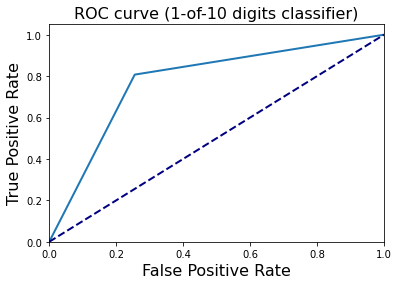

knn-Smote
score on train data with knn-Smote  : 0.9470522492316289
---------------------------------------------------------------------------------------
score on test data with  knn-Smote  : 0.9249790444258172
---------------------------------------------------------------------------------------
preceision:  0.8705712219812003
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( knn-Smote )

            Not one     One 
    Not one  1003.0   179.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1003  179]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9242808798646361
---------------------------------------------------------------------------------------
F1:  0.9

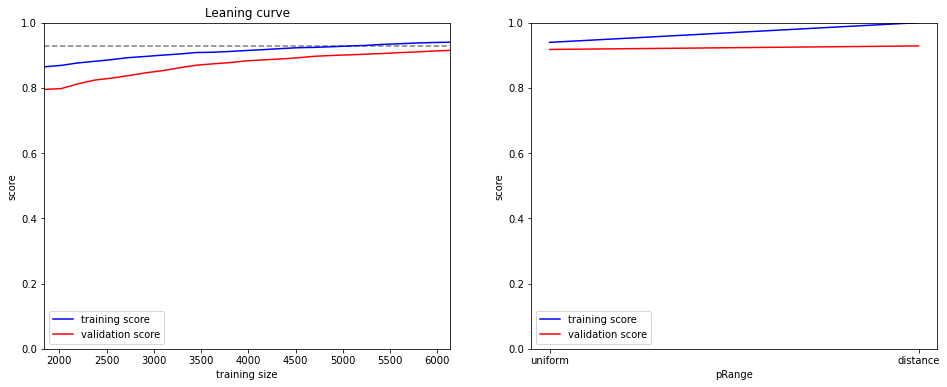

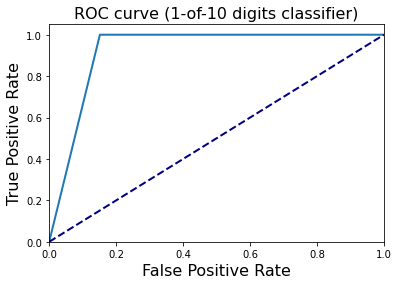

guassianNB-Smote
score on train data with guassianNB-Smote  : 0.6130203967588712
---------------------------------------------------------------------------------------
score on test data with  guassianNB-Smote  : 0.6131601005867561
---------------------------------------------------------------------------------------
preceision:  0.566872917658258
---------------------------------------------------------------------------------------
recall:  0.989202657807309
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-Smote )

            Not one     One 
    Not one   272.0   910.0 
        One    13.0  1191.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 272  910]
 [  13 1191]]
---------------------------------------------------------------------------------------
Test set AUC:  0.6096605505618609
-------------------------------------------------------

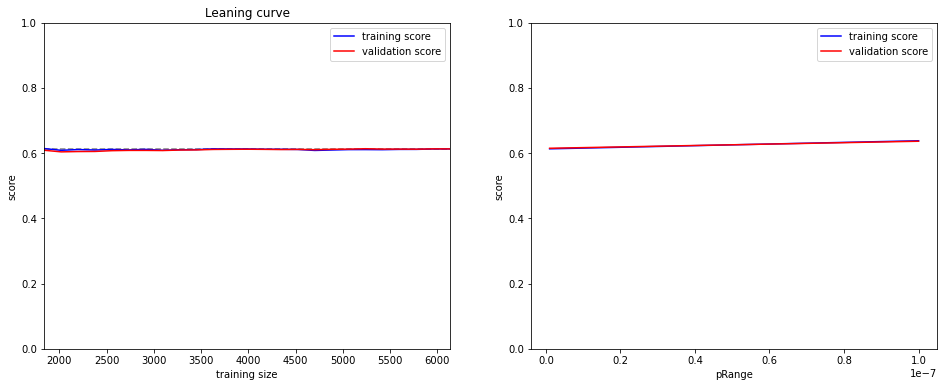

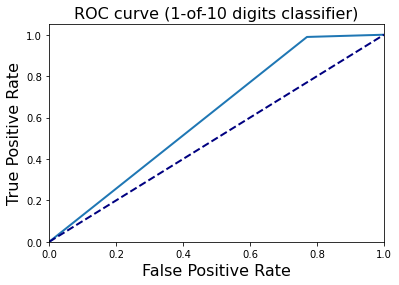

support vector machine-Smote
score on train data with support vector machine-Smote  : 0.8118189438390612
---------------------------------------------------------------------------------------
score on test data with  support vector machine-Smote  : 0.8055322715842415
---------------------------------------------------------------------------------------
preceision:  0.7761194029850746
---------------------------------------------------------------------------------------
recall:  0.8637873754152824
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-Smote )

            Not one     One 
    Not one   882.0   300.0 
        One   164.0  1040.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 882  300]
 [ 164 1040]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8049901344081488
-----

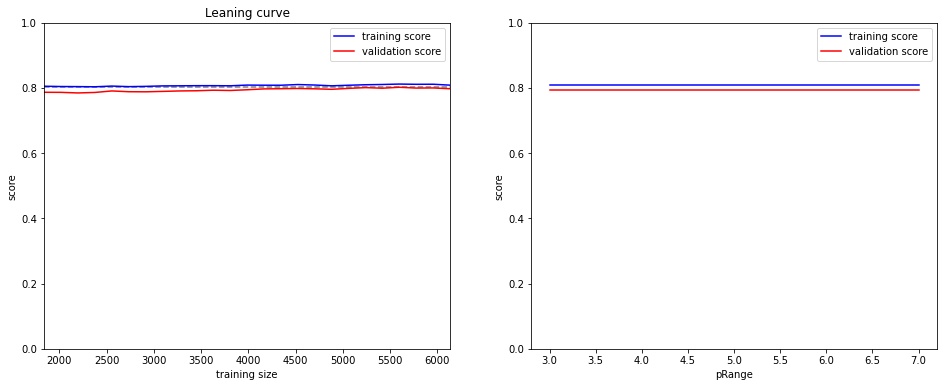

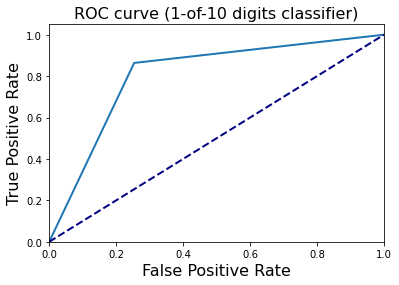

DecisionTree Classifier-Smote
score on train data with DecisionTree Classifier-Smote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-Smote  : 0.9740150880134115
---------------------------------------------------------------------------------------
preceision:  0.9510268562401264
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-Smote )

            Not one     One 
    Not one  1120.0    62.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1120   62]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9737732656514382
-------------------------------

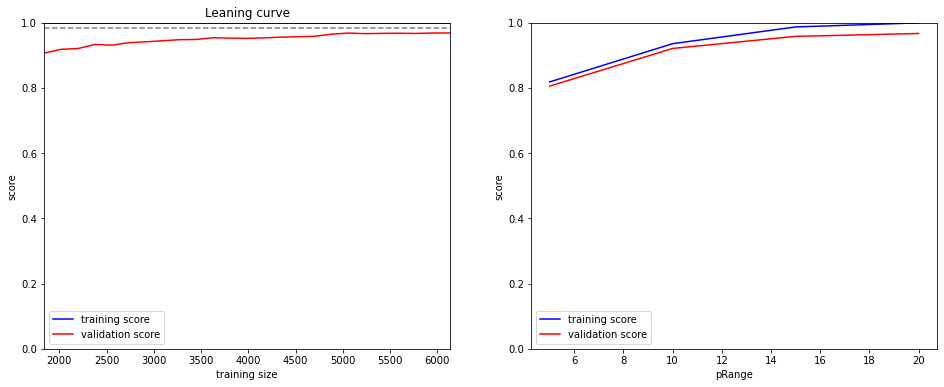

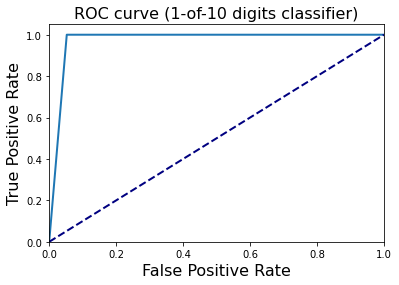

RandomForestClassifier
score on train data with RandomForestClassifier  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier  : 0.987845766974015
---------------------------------------------------------------------------------------
preceision:  0.9764801297648013
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier )

            Not one     One 
    Not one  1153.0    29.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1153   29]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9877326565143825
------------------------------------------------------------

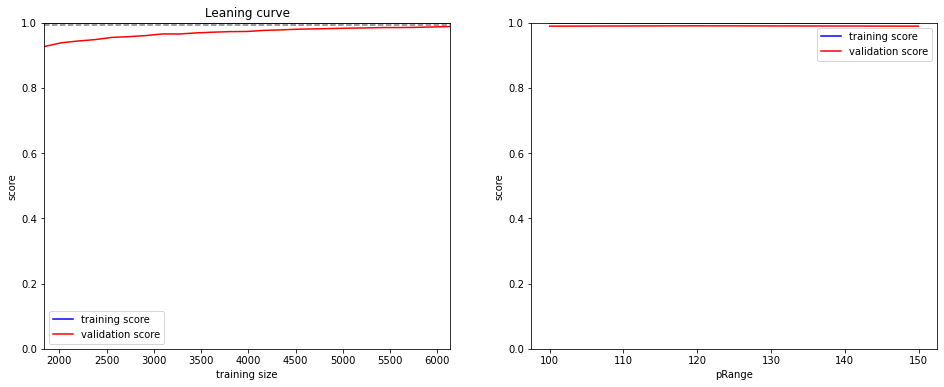

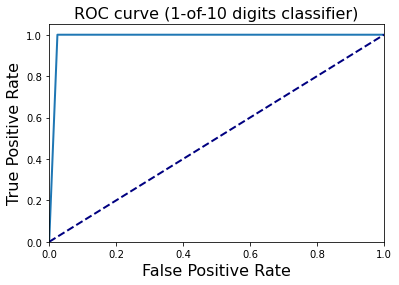

AdaBoostClassifier-Smote
score on train data with AdaBoostClassifier-Smote  : 0.7964515227717239
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-Smote  : 0.8021793797150042
---------------------------------------------------------------------------------------
preceision:  0.775187969924812
---------------------------------------------------------------------------------------
recall:  0.856312292358804
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-Smote )

            Not one     One 
    Not one   883.0   299.0 
        One   173.0  1031.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 883  299]
 [ 173 1031]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8016756047242413
-----------------------

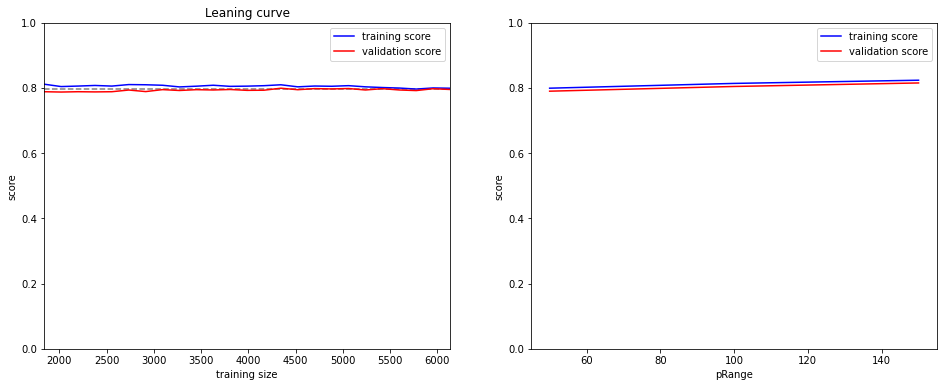

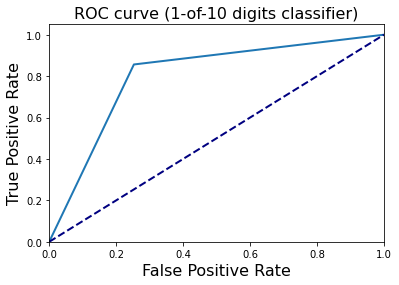

In [61]:
models('DummyClassifier-Smote',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-Smote',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-Smote',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-Smote',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-Smote',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-Smote',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-Smote',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100,150])

Try with Pca

DummyClassifier-pcaSmote
score on train data with DummyClassifier-pcaSmote  : 0.507264599050014
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-pcaSmote  : 0.4953897736797988
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-pcaSmote )

            Not one     One 
    Not one  1182.0     0.0 
        One  1204.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1182    0]
 [1204    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
-------------------------------------------------------------------

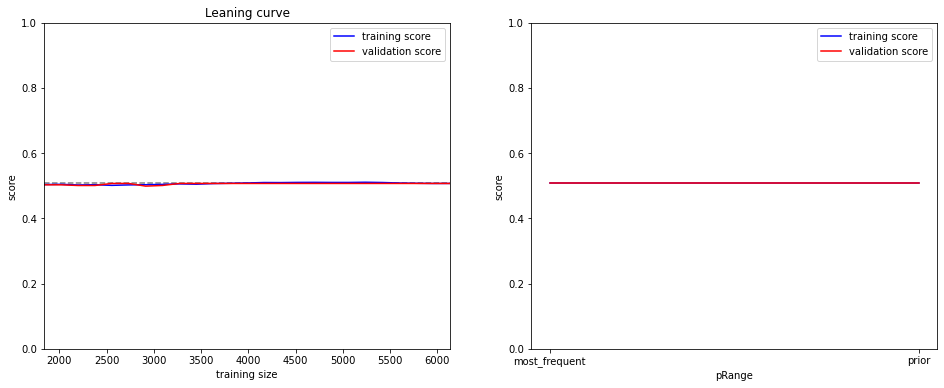

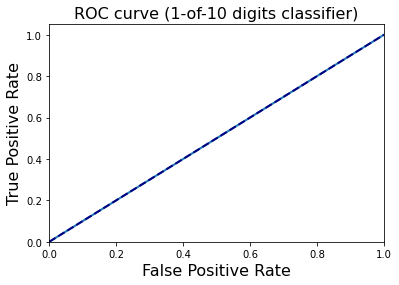

logistic regression-pcaSmote
score on train data with logistic regression-pcaSmote  : 0.7355406538139145
---------------------------------------------------------------------------------------
score on test data with  logistic regression-pcaSmote  : 0.7296730930427494
---------------------------------------------------------------------------------------
preceision:  0.7362637362637363
---------------------------------------------------------------------------------------
recall:  0.723421926910299
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-pcaSmote )

            Not one     One 
    Not one   870.0   312.0 
        One   333.0   871.0 
---------------------------------------------------------------------------------------
classification report:
 [[870 312]
 [333 871]]
---------------------------------------------------------------------------------------
Test set AUC:  0.7297312680236775
----------

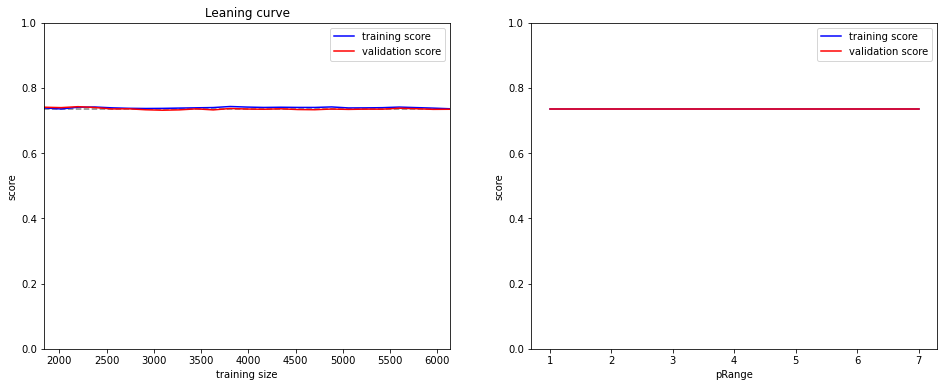

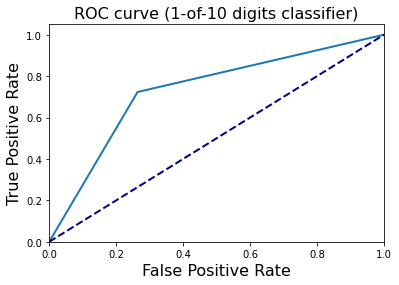

knn-pcaSmote
score on train data with knn-pcaSmote  : 0.9478904721989383
---------------------------------------------------------------------------------------
score on test data with  knn-pcaSmote  : 0.9216261525565801
---------------------------------------------------------------------------------------
preceision:  0.8655643421998562
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( knn-pcaSmote )

            Not one     One 
    Not one   995.0   187.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 995  187]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9208967851099831
------------------------------------------------------------------------------------

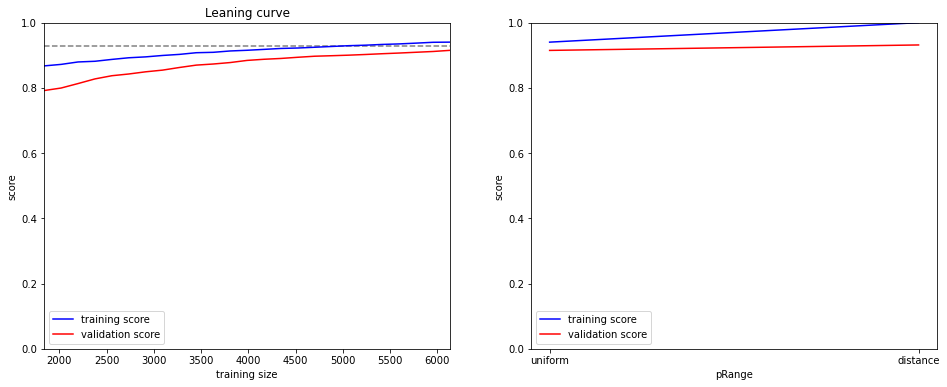

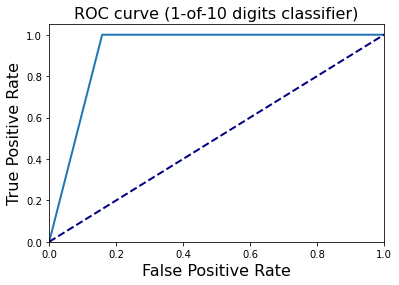

guassianNB-pcaSmote
score on train data with guassianNB-pcaSmote  : 0.6797988264878457
---------------------------------------------------------------------------------------
score on test data with  guassianNB-pcaSmote  : 0.6634534786253143
---------------------------------------------------------------------------------------
preceision:  0.7082035306334372
---------------------------------------------------------------------------------------
recall:  0.5664451827242525
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-pcaSmote )

            Not one     One 
    Not one   901.0   281.0 
        One   522.0   682.0 
---------------------------------------------------------------------------------------
classification report:
 [[901 281]
 [522 682]]
---------------------------------------------------------------------------------------
Test set AUC:  0.664356263104935
----------------------------------------------

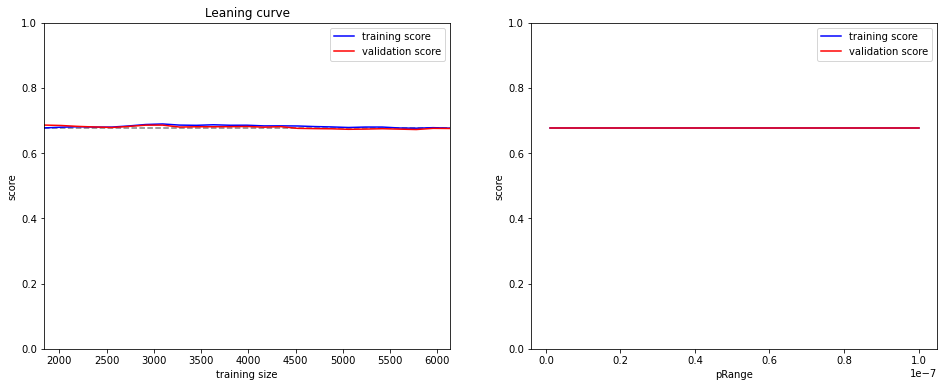

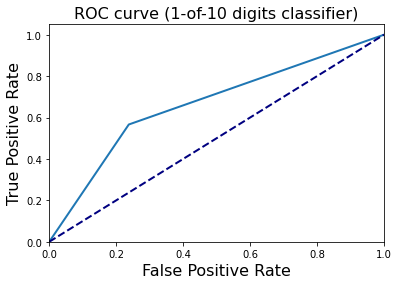

support vector machine-pcaSmote
score on train data with support vector machine-pcaSmote  : 0.7872310701313217
---------------------------------------------------------------------------------------
score on test data with  support vector machine-pcaSmote  : 0.7661357921207042
---------------------------------------------------------------------------------------
preceision:  0.7399702823179792
---------------------------------------------------------------------------------------
recall:  0.8272425249169435
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-pcaSmote )

            Not one     One 
    Not one   832.0   350.0 
        One   208.0   996.0 
---------------------------------------------------------------------------------------
classification report:
 [[832 350]
 [208 996]]
---------------------------------------------------------------------------------------
Test set AUC:  0.76556711694239

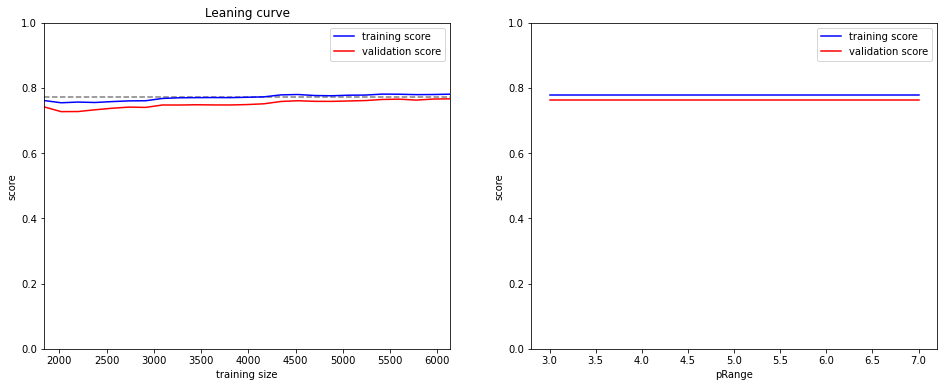

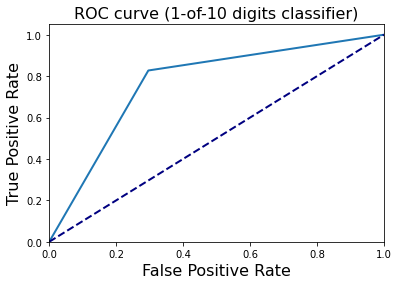

DecisionTree Classifier-pcaSmote
score on train data with DecisionTree Classifier-pcaSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-pcaSmote  : 0.9735959765297569
---------------------------------------------------------------------------------------
preceision:  0.9502762430939227
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-pcaSmote )

            Not one     One 
    Not one  1119.0    63.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1119   63]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9733502538071066
-------------------

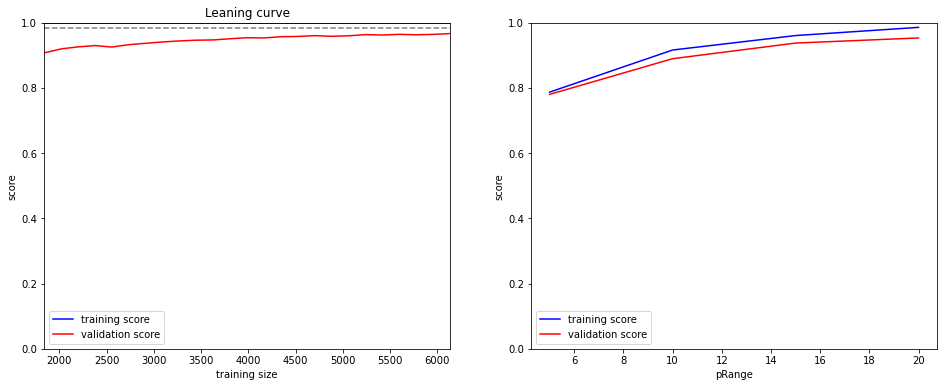

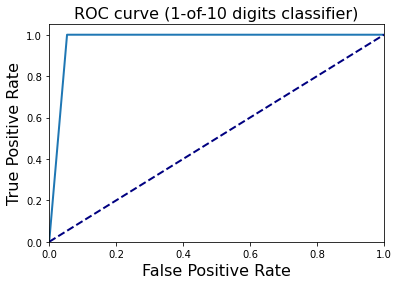

RandomForestClassifier-pcaSmote
score on train data with RandomForestClassifier-pcaSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-pcaSmote  : 0.9744341994970662
---------------------------------------------------------------------------------------
preceision:  0.9517786561264822
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-pcaSmote )

            Not one     One 
    Not one  1121.0    61.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1121   61]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9741962774957699
-----------------------

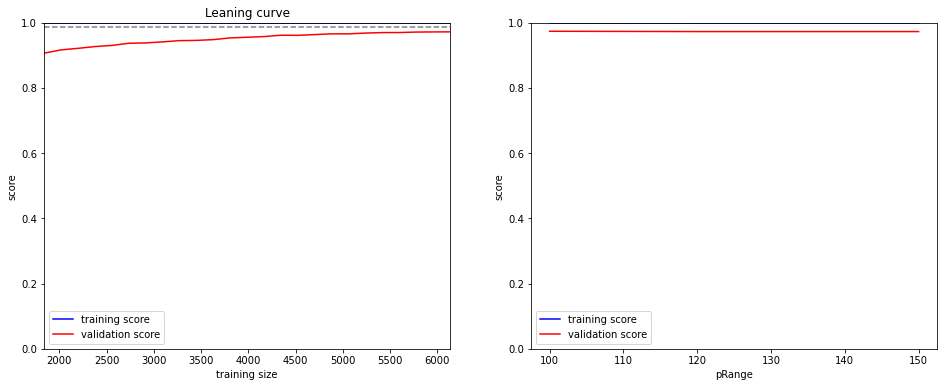

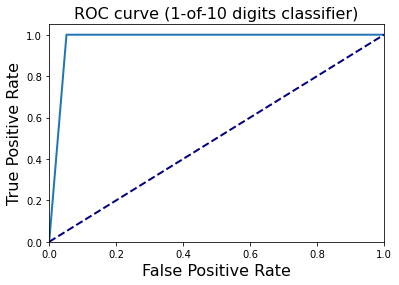

AdaBoostClassifier-pcaSmote
score on train data with AdaBoostClassifier-pcaSmote  : 0.7834590667784297
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-pcaSmote  : 0.7657166806370495
---------------------------------------------------------------------------------------
preceision:  0.7671913835956918
---------------------------------------------------------------------------------------
recall:  0.7691029900332226
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-pcaSmote )

            Not one     One 
    Not one   901.0   281.0 
        One   278.0   926.0 
---------------------------------------------------------------------------------------
classification report:
 [[901 281]
 [278 926]]
---------------------------------------------------------------------------------------
Test set AUC:  0.76568516675942
---------------

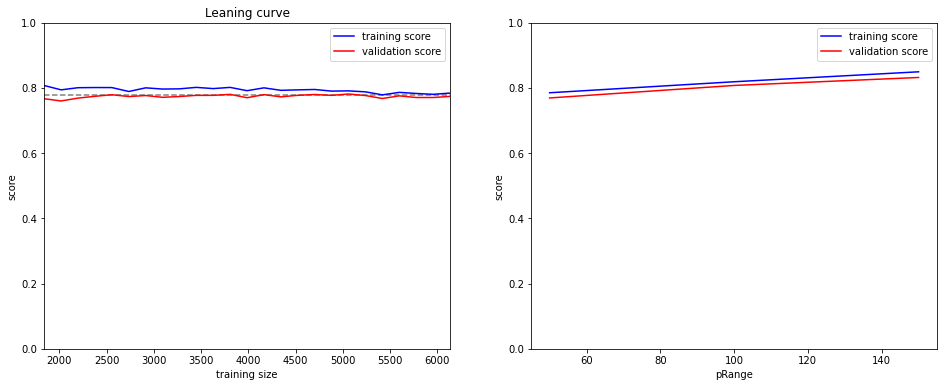

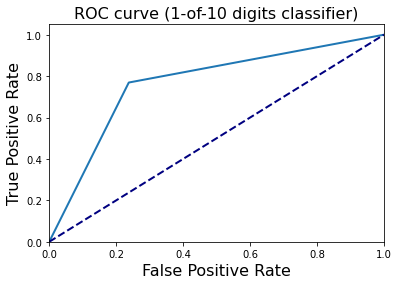

In [62]:
models('DummyClassifier-pcaSmote',DummyClassifier(strategy = 'most_frequent'),x_train_pca,y_train_copy,x_test_pca,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-pcaSmote',LogisticRegression(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-pcaSmote',KNeighborsClassifier(),x_train_pca,y_train_copy,x_test_pca,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-pcaSmote',GaussianNB(),x_train_pca,y_train_copy,x_test_pca,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-pcaSmote',SVC(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-pcaSmote',DecisionTreeClassifier(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-pcaSmote',RandomForestClassifier(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-pcaSmote',AdaBoostClassifier(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100,150])

try pca with scaler

In [63]:
x_train_pca , x_test_pca = pca(10,x_train_scaled_standard,x_test_scaled_standard)

X_train.shape: (7158, 18)
X_train_pca.shape: (7158, 10)


DummyClassifier-pcaScalerSmote
score on train data with DummyClassifier-pcaScalerSmote  : 0.507264599050014
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-pcaScalerSmote  : 0.4953897736797988
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-pcaScalerSmote )

            Not one     One 
    Not one  1182.0     0.0 
        One  1204.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1182    0]
 [1204    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
-------------------------------------------

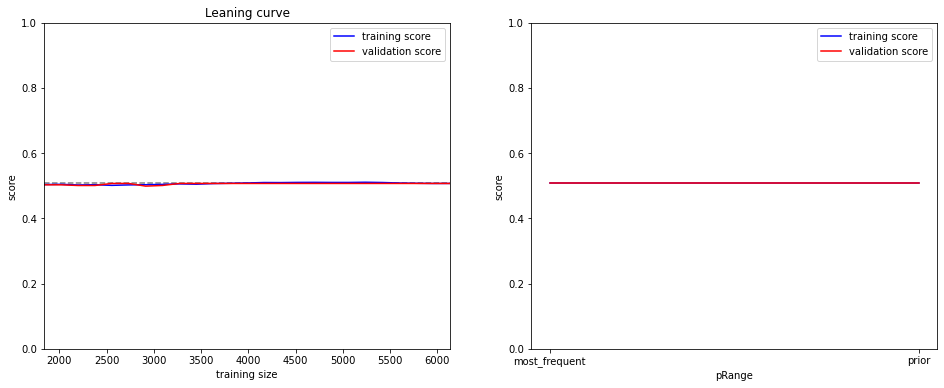

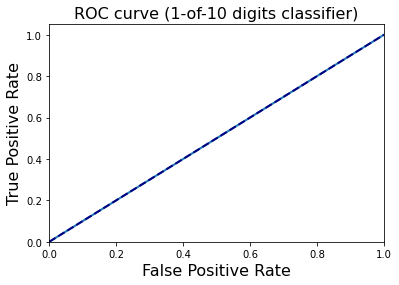

logistic regression-pcaScalerSmote
score on train data with logistic regression-pcaScalerSmote  : 0.7365185806091087
---------------------------------------------------------------------------------------
score on test data with  logistic regression-pcaScalerSmote  : 0.7229673093042749
---------------------------------------------------------------------------------------
preceision:  0.7159904534606205
---------------------------------------------------------------------------------------
recall:  0.7475083056478405
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-pcaScalerSmote )

            Not one     One 
    Not one   825.0   357.0 
        One   304.0   900.0 
---------------------------------------------------------------------------------------
classification report:
 [[825 357]
 [304 900]]
---------------------------------------------------------------------------------------
Test set AUC:  0.72

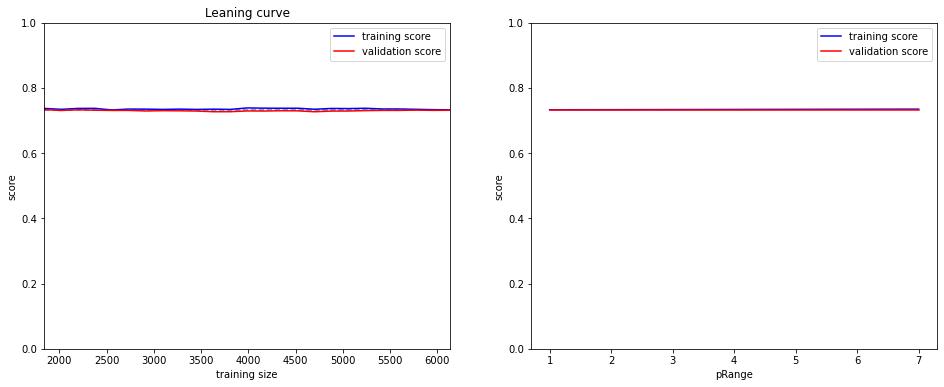

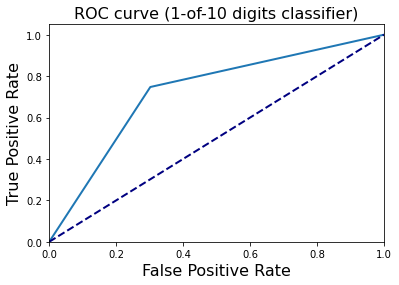

knn-pcaScalerSmote
score on train data with knn-pcaScalerSmote  : 0.9453758032970103
---------------------------------------------------------------------------------------
score on test data with  knn-pcaScalerSmote  : 0.9161777032690696
---------------------------------------------------------------------------------------
preceision:  0.8575498575498576
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( knn-pcaScalerSmote )

            Not one     One 
    Not one   982.0   200.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 982  200]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9153976311336717
------------------------------------------------------------

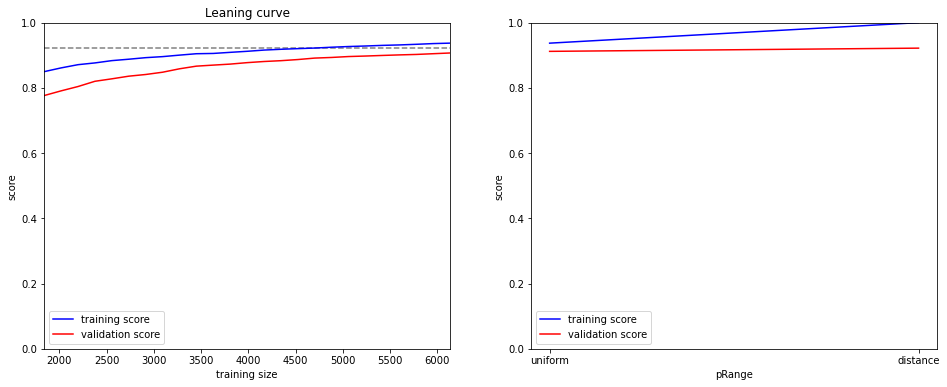

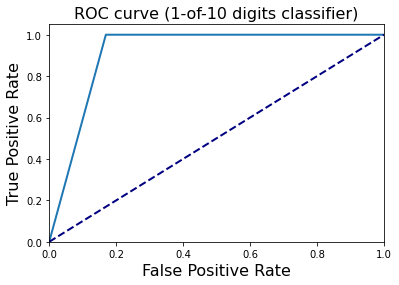

guassianNB-pcaScalerSmote
score on train data with guassianNB-pcaScalerSmote  : 0.6683431126012853
---------------------------------------------------------------------------------------
score on test data with  guassianNB-pcaScalerSmote  : 0.6609388097233864
---------------------------------------------------------------------------------------
preceision:  0.6210913549969344
---------------------------------------------------------------------------------------
recall:  0.8413621262458472
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-pcaScalerSmote )

            Not one     One 
    Not one   564.0   618.0 
        One   191.0  1013.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 564  618]
 [ 191 1013]]
---------------------------------------------------------------------------------------
Test set AUC:  0.6592597433259693
-----------------

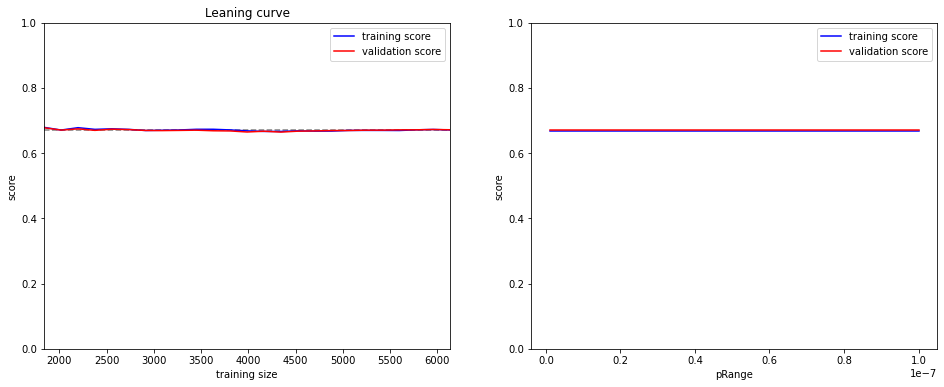

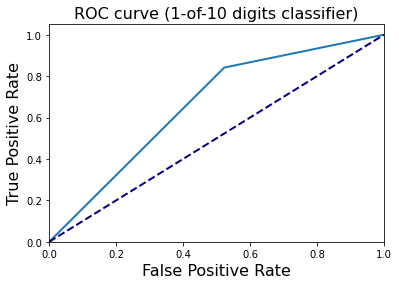

support vector machine-pcaScalerSmote
score on train data with support vector machine-pcaScalerSmote  : 0.7875104777870914
---------------------------------------------------------------------------------------
score on test data with  support vector machine-pcaScalerSmote  : 0.7715842414082146
---------------------------------------------------------------------------------------
preceision:  0.7486792452830189
---------------------------------------------------------------------------------------
recall:  0.8239202657807309
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-pcaScalerSmote )

            Not one     One 
    Not one   849.0   333.0 
        One   212.0   992.0 
---------------------------------------------------------------------------------------
classification report:
 [[849 333]
 [212 992]]
---------------------------------------------------------------------------------------
Test se

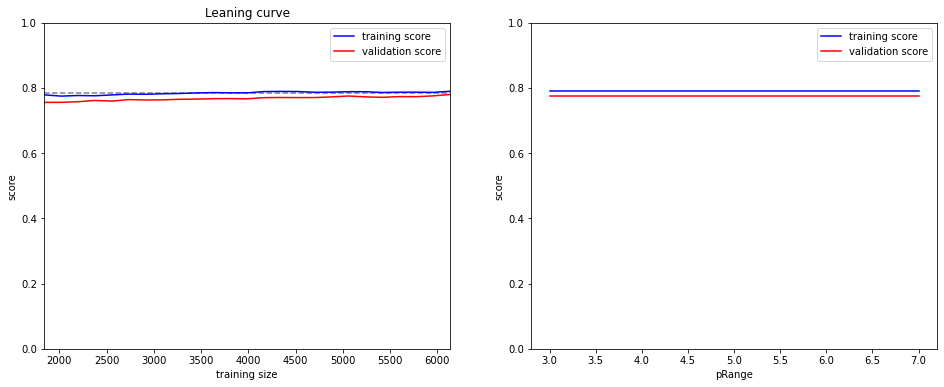

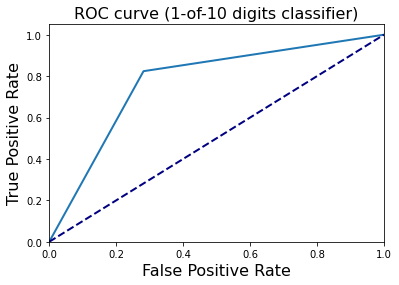

DecisionTree Classifier-pcaScalerSmote
score on train data with DecisionTree Classifier-pcaScalerSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-pcaScalerSmote  : 0.9664710813076278
---------------------------------------------------------------------------------------
preceision:  0.9376947040498442
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-pcaScalerSmote )

            Not one     One 
    Not one  1102.0    80.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1102   80]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.966159052453

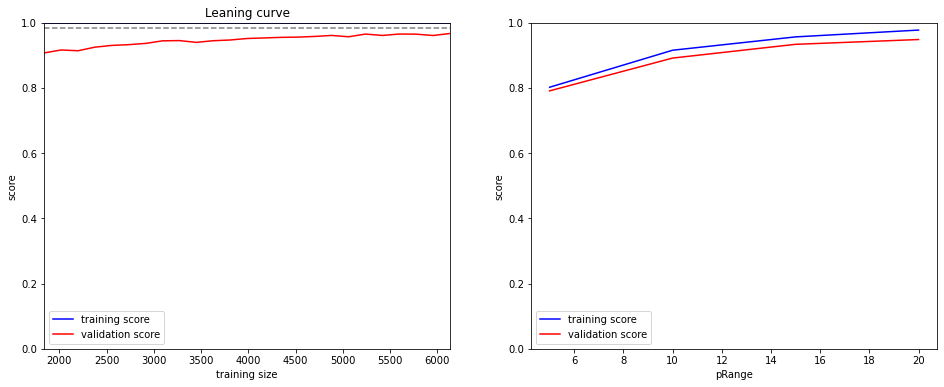

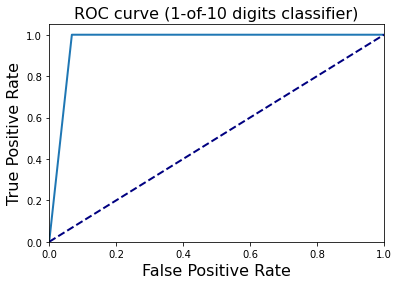

RandomForestClassifier-pcaScalerSmote
score on train data with RandomForestClassifier-pcaScalerSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-pcaScalerSmote  : 0.9849119865884325
---------------------------------------------------------------------------------------
preceision:  0.9709677419354839
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-pcaScalerSmote )

            Not one     One 
    Not one  1146.0    36.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1146   36]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.984771573604061


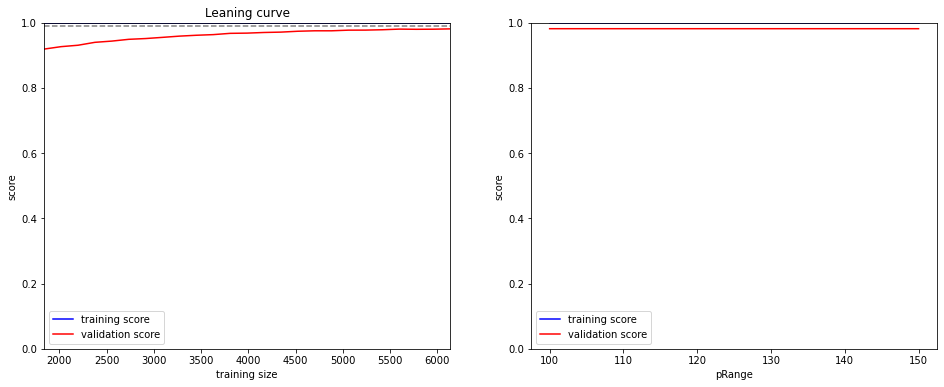

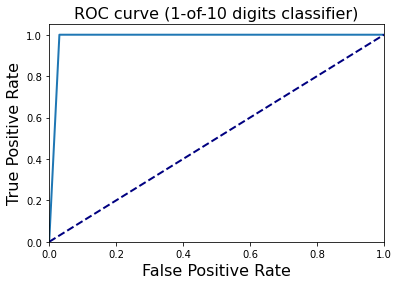

AdaBoostClassifier-pcaScalerSmote
score on train data with AdaBoostClassifier-pcaScalerSmote  : 0.7812238055322716
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-pcaScalerSmote  : 0.7732606873428332
---------------------------------------------------------------------------------------
preceision:  0.7583787996882307
---------------------------------------------------------------------------------------
recall:  0.8081395348837209
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-pcaScalerSmote )

            Not one     One 
    Not one   872.0   310.0 
        One   231.0   973.0 
---------------------------------------------------------------------------------------
classification report:
 [[872 310]
 [231 973]]
---------------------------------------------------------------------------------------
Test set AUC:  0.772936

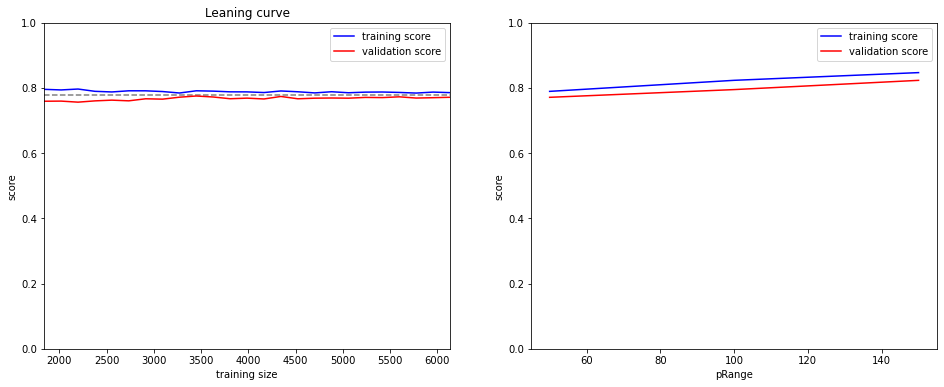

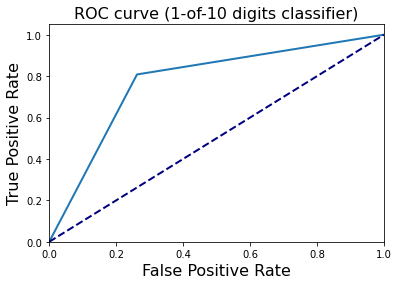

In [64]:
models('DummyClassifier-pcaScalerSmote',DummyClassifier(strategy = 'most_frequent'),x_train_pca,y_train_copy,x_test_pca,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-pcaScalerSmote',LogisticRegression(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-pcaScalerSmote',KNeighborsClassifier(),x_train_pca,y_train_copy,x_test_pca,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-pcaScalerSmote',GaussianNB(),x_train_pca,y_train_copy,x_test_pca,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-pcaScalerSmote',SVC(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-pcaScalerSmote',DecisionTreeClassifier(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-pcaScalerSmote',RandomForestClassifier(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-pcaScalerSmote',AdaBoostClassifier(random_state=0),x_train_pca,y_train_copy,x_test_pca,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100,150])

try with scaler only

In [65]:
x_train_copy = x_train_scaled_standard
x_test_copy = x_test_scaled_standard

DummyClassifier-scaledSmote
score on train data with DummyClassifier-scaledSmote  : 0.507264599050014
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-scaledSmote  : 0.4953897736797988
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-scaledSmote )

            Not one     One 
    Not one  1182.0     0.0 
        One  1204.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1182    0]
 [1204    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
-------------------------------------------------------

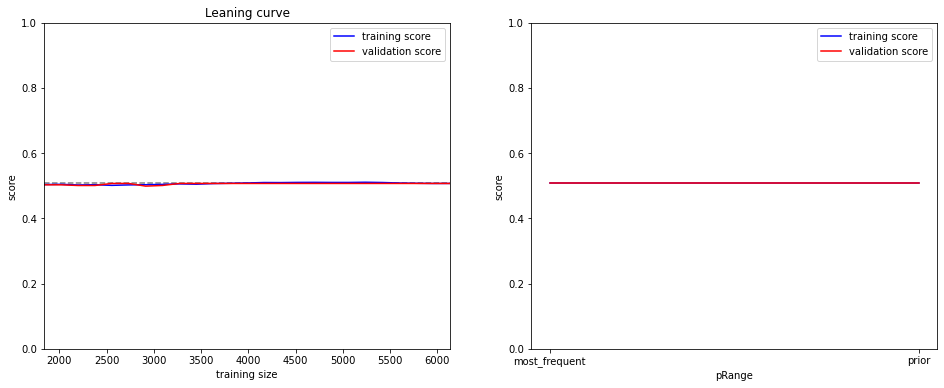

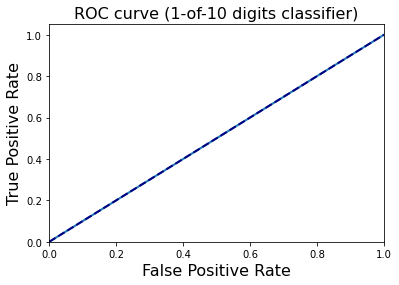

logistic regression-scaledSmote
score on train data with logistic regression-scaledSmote  : 0.7703269069572506
---------------------------------------------------------------------------------------
score on test data with  logistic regression-scaledSmote  : 0.7761944677284157
---------------------------------------------------------------------------------------
preceision:  0.7629513343799058
---------------------------------------------------------------------------------------
recall:  0.8073089700996677
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-scaledSmote )

            Not one     One 
    Not one   880.0   302.0 
        One   232.0   972.0 
---------------------------------------------------------------------------------------
classification report:
 [[880 302]
 [232 972]]
---------------------------------------------------------------------------------------
Test set AUC:  0.77590490806167

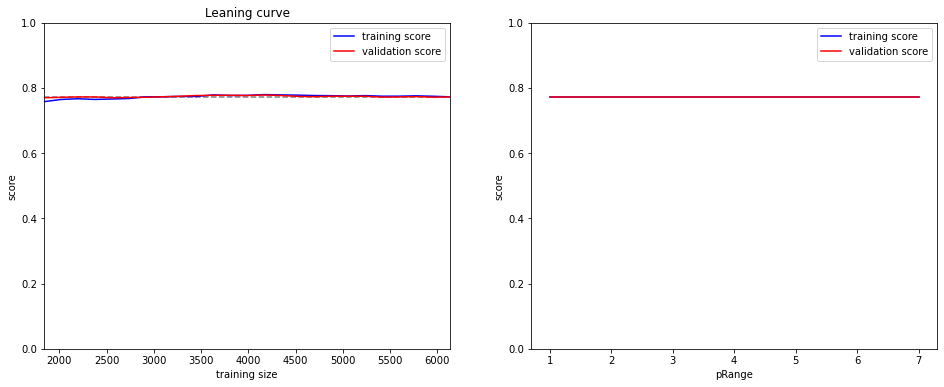

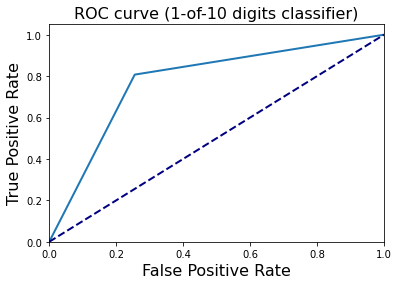

knn-scaledSmote
score on train data with knn-scaledSmote  : 0.9456552109527802
---------------------------------------------------------------------------------------
score on test data with  knn-scaledSmote  : 0.9262363788767812
---------------------------------------------------------------------------------------
preceision:  0.8724637681159421
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( knn-scaledSmote )

            Not one     One 
    Not one  1006.0   176.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1006  176]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9255499153976312
------------------------------------------------------------------------

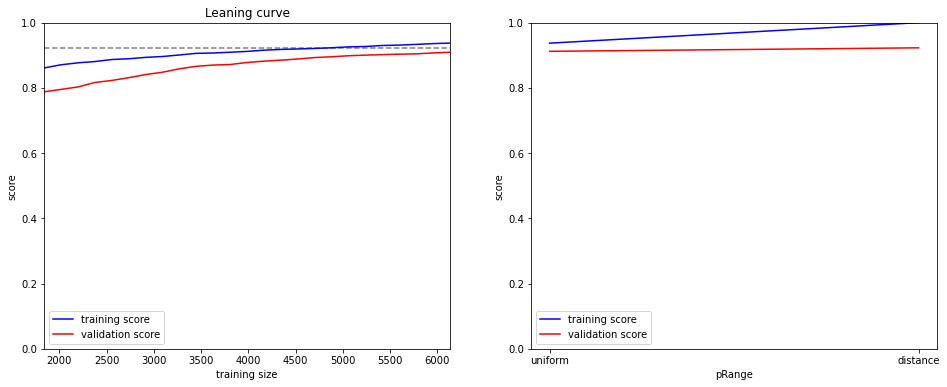

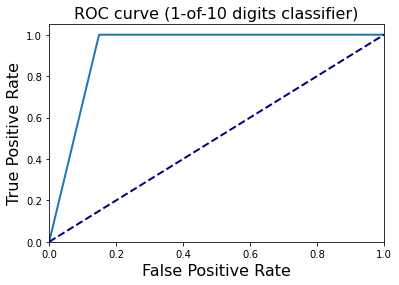

guassianNB-scaledSmote
score on train data with guassianNB-scaledSmote  : 0.5765576976809165
---------------------------------------------------------------------------------------
score on test data with  guassianNB-scaledSmote  : 0.5733445096395641
---------------------------------------------------------------------------------------
preceision:  0.5423497267759563
---------------------------------------------------------------------------------------
recall:  0.989202657807309
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-scaledSmote )

            Not one     One 
    Not one   177.0  1005.0 
        One    13.0  1191.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 177 1005]
 [  13 1191]]
---------------------------------------------------------------------------------------
Test set AUC:  0.569474425350355
-------------------------------

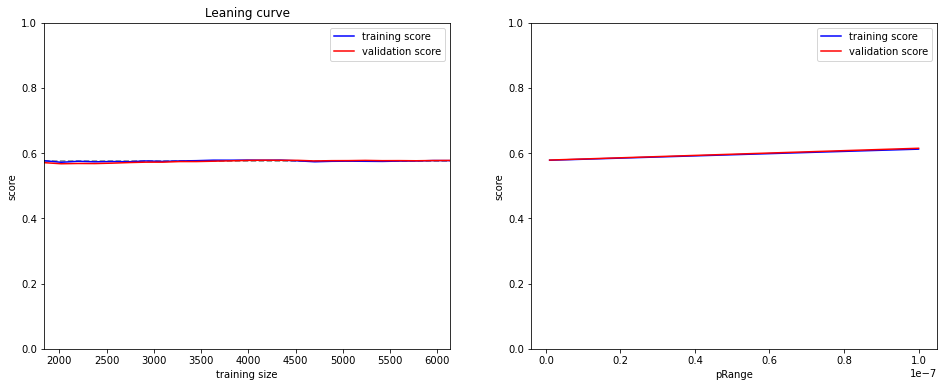

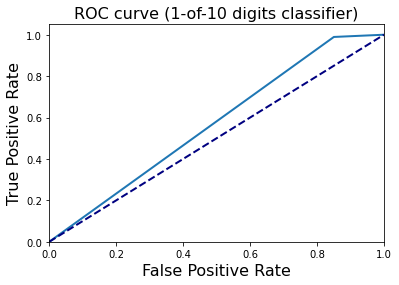

support vector machine-scaledSmote
score on train data with support vector machine-scaledSmote  : 0.8446493433920089
---------------------------------------------------------------------------------------
score on test data with  support vector machine-scaledSmote  : 0.8310980720871752
---------------------------------------------------------------------------------------
preceision:  0.7995512341062079
---------------------------------------------------------------------------------------
recall:  0.8878737541528239
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-scaledSmote )

            Not one     One 
    Not one   914.0   268.0 
        One   135.0  1069.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 914  268]
 [ 135 1069]]
---------------------------------------------------------------------------------------
Test set AUC:  

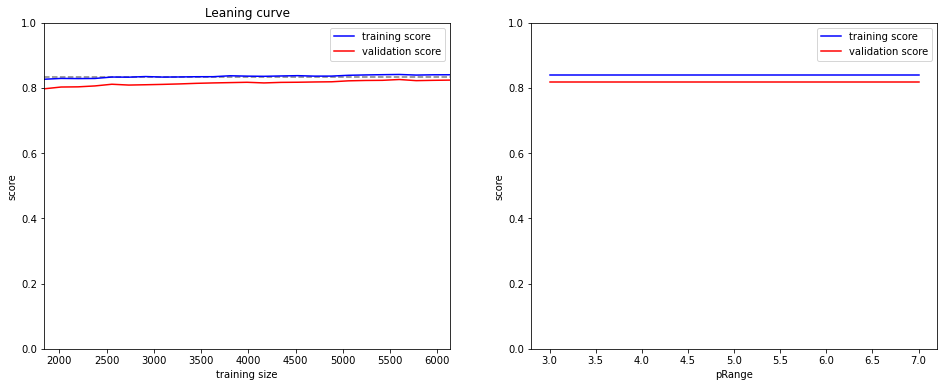

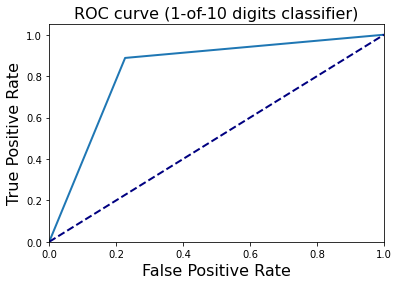

DecisionTree Classifier-scaledSmote
score on train data with DecisionTree Classifier-scaledSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-scaledSmote  : 0.9731768650461022
---------------------------------------------------------------------------------------
preceision:  0.9495268138801262
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-scaledSmote )

            Not one     One 
    Not one  1118.0    64.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1118   64]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.972927241962775
--------

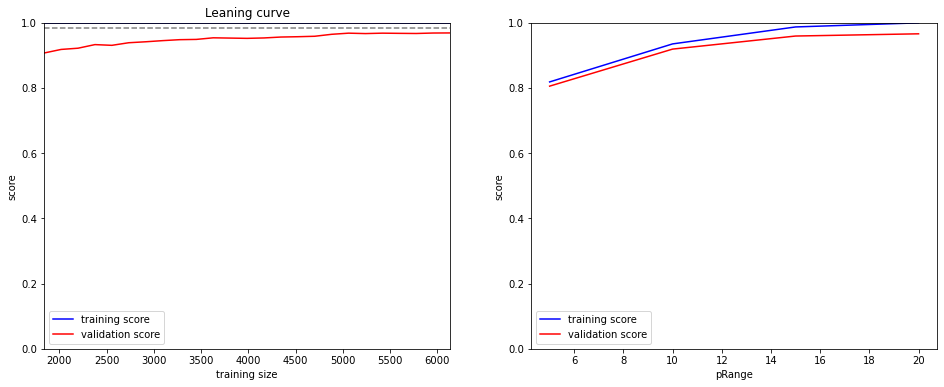

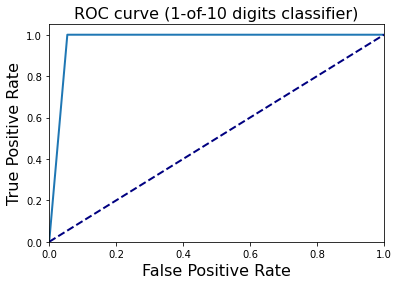

RandomForestClassifier-scaledSmote
score on train data with RandomForestClassifier-scaledSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-scaledSmote  : 0.987845766974015
---------------------------------------------------------------------------------------
preceision:  0.9764801297648013
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-scaledSmote )

            Not one     One 
    Not one  1153.0    29.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1153   29]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9877326565143825
------------

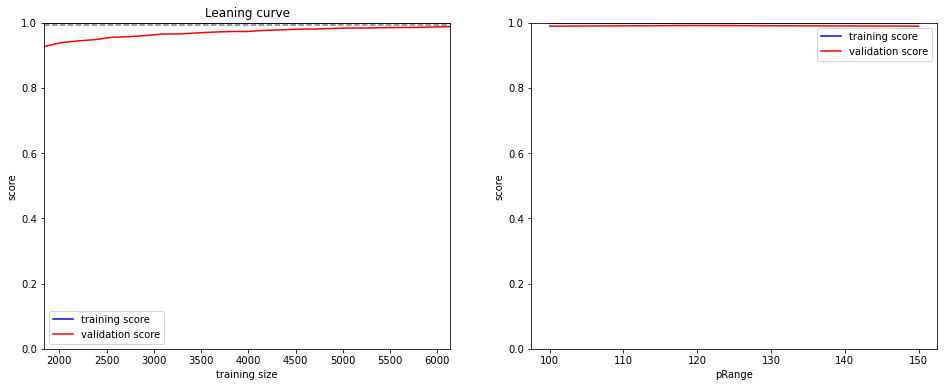

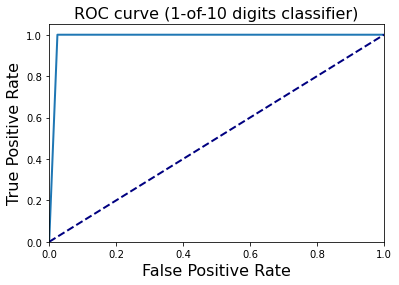

AdaBoostClassifier-scaledSmote
score on train data with AdaBoostClassifier-scaledSmote  : 0.7964515227717239
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-scaledSmote  : 0.8021793797150042
---------------------------------------------------------------------------------------
preceision:  0.775187969924812
---------------------------------------------------------------------------------------
recall:  0.856312292358804
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-scaledSmote )

            Not one     One 
    Not one   883.0   299.0 
        One   173.0  1031.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 883  299]
 [ 173 1031]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8016756047242413

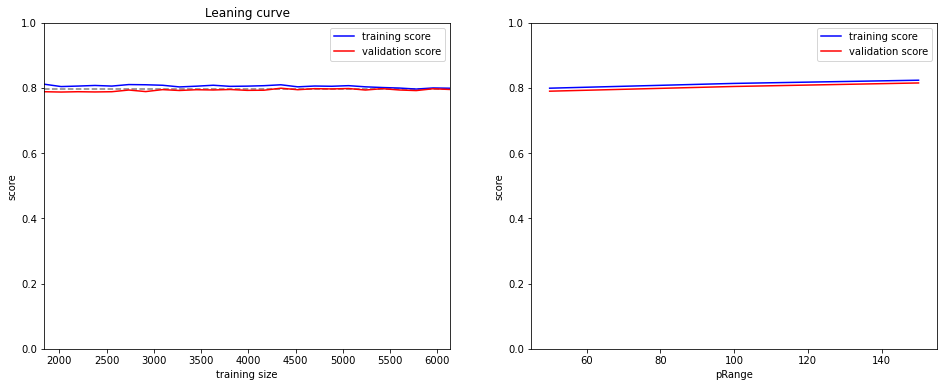

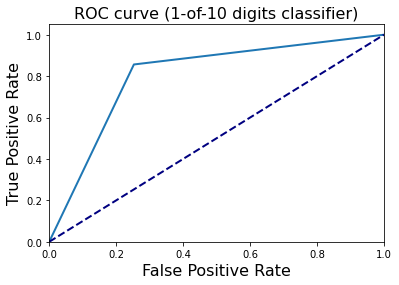

In [66]:
models('DummyClassifier-scaledSmote',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-scaledSmote',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-scaledSmote',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-scaledSmote',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-scaledSmote',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-scaledSmote',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-scaledSmote',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-scaledSmote',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100,150])

let's try another scaler type

In [67]:
x_train_copy = x_train_scaled_MinMax
x_test_copy = x_test_scaled_MinMax

DummyClassifier-minmaxSmote
score on train data with DummyClassifier-minmaxSmote  : 0.507264599050014
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-minmaxSmote  : 0.4953897736797988
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-minmaxSmote )

            Not one     One 
    Not one  1182.0     0.0 
        One  1204.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1182    0]
 [1204    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
-------------------------------------------------------

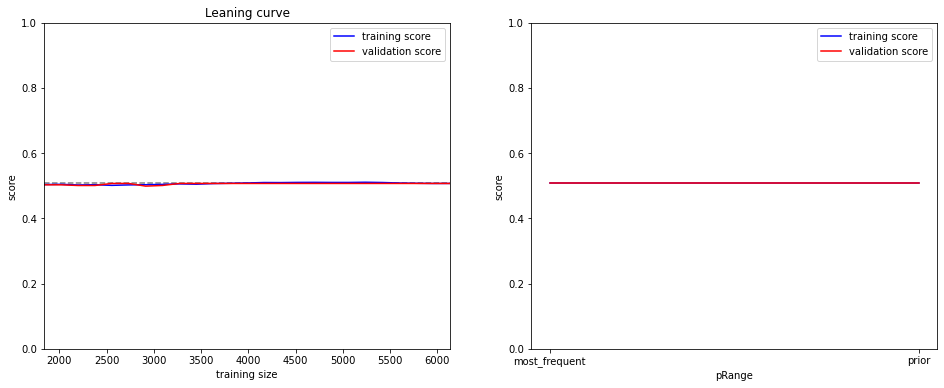

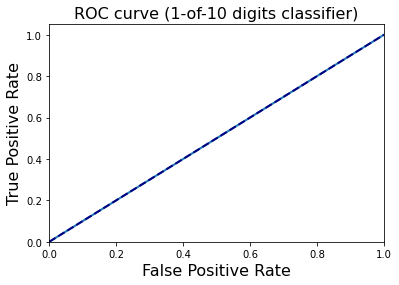

logistic regression-minmaxSmote
score on train data with logistic regression-minmaxSmote  : 0.7693489801620564
---------------------------------------------------------------------------------------
score on test data with  logistic regression-minmaxSmote  : 0.7761944677284157
---------------------------------------------------------------------------------------
preceision:  0.7629513343799058
---------------------------------------------------------------------------------------
recall:  0.8073089700996677
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-minmaxSmote )

            Not one     One 
    Not one   880.0   302.0 
        One   232.0   972.0 
---------------------------------------------------------------------------------------
classification report:
 [[880 302]
 [232 972]]
---------------------------------------------------------------------------------------
Test set AUC:  0.77590490806167

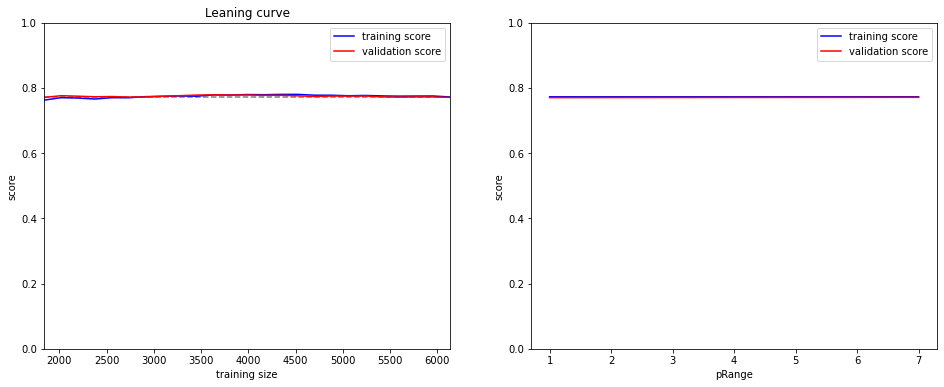

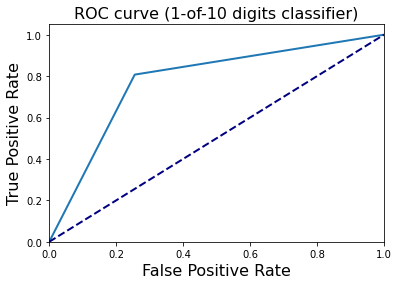

knn-minmaxSmote
score on train data with knn-minmaxSmote  : 0.9470522492316289
---------------------------------------------------------------------------------------
score on test data with  knn-minmaxSmote  : 0.9245599329421627
---------------------------------------------------------------------------------------
preceision:  0.869942196531792
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( knn-minmaxSmote )

            Not one     One 
    Not one  1002.0   180.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1002  180]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9238578680203046
-------------------------------------------------------------------------

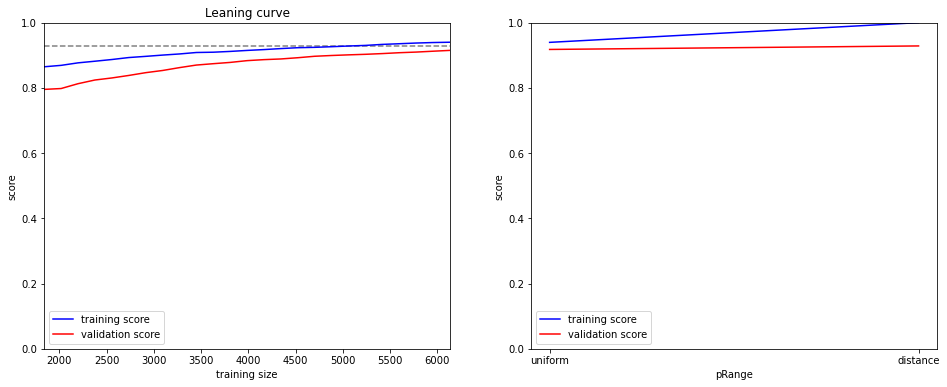

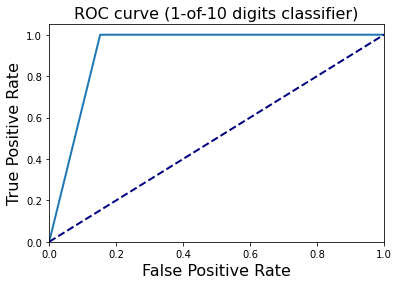

guassianNB-minmaxSmote
score on train data with guassianNB-minmaxSmote  : 0.6130203967588712
---------------------------------------------------------------------------------------
score on test data with  guassianNB-minmaxSmote  : 0.6131601005867561
---------------------------------------------------------------------------------------
preceision:  0.566872917658258
---------------------------------------------------------------------------------------
recall:  0.989202657807309
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-minmaxSmote )

            Not one     One 
    Not one   272.0   910.0 
        One    13.0  1191.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 272  910]
 [  13 1191]]
---------------------------------------------------------------------------------------
Test set AUC:  0.6096605505618609
-------------------------------

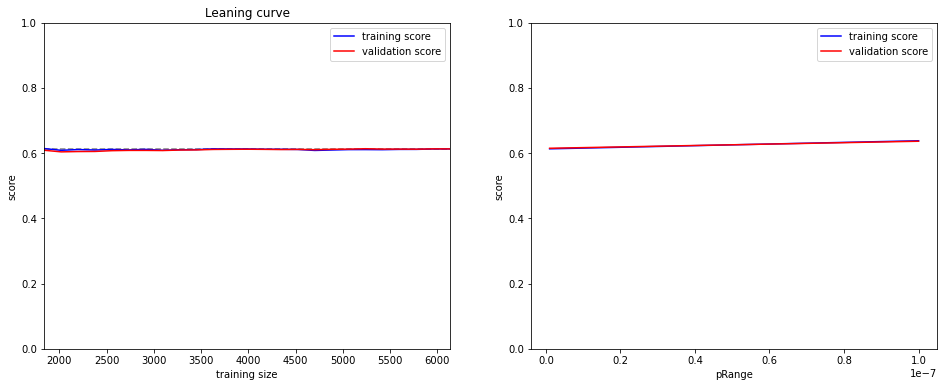

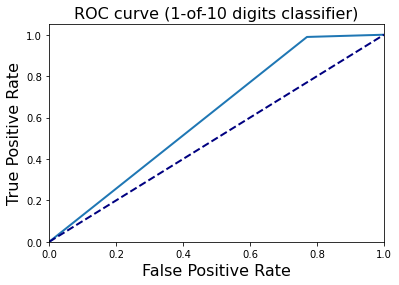

support vector machine-minmaxSmote
score on train data with support vector machine-minmaxSmote  : 0.8116792400111763
---------------------------------------------------------------------------------------
score on test data with  support vector machine-minmaxSmote  : 0.8055322715842415
---------------------------------------------------------------------------------------
preceision:  0.7761194029850746
---------------------------------------------------------------------------------------
recall:  0.8637873754152824
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-minmaxSmote )

            Not one     One 
    Not one   882.0   300.0 
        One   164.0  1040.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 882  300]
 [ 164 1040]]
---------------------------------------------------------------------------------------
Test set AUC:  

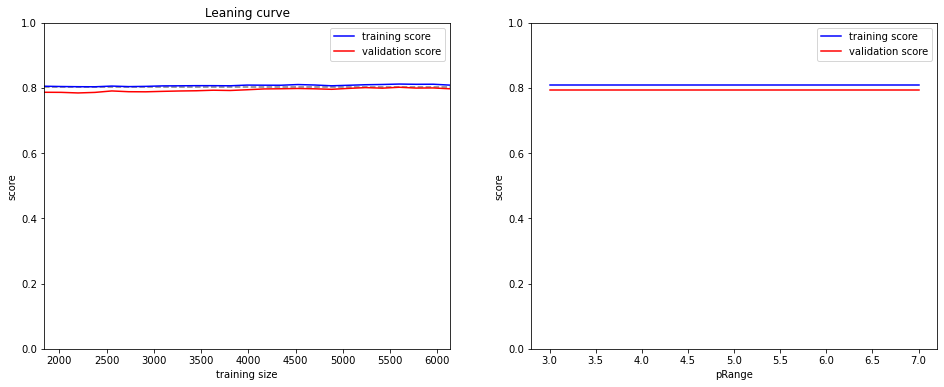

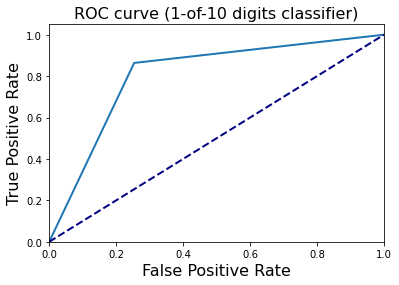

DecisionTree Classifier-minmaxSmote
score on train data with DecisionTree Classifier-minmaxSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-minmaxSmote  : 0.9740150880134115
---------------------------------------------------------------------------------------
preceision:  0.9510268562401264
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-minmaxSmote )

            Not one     One 
    Not one  1120.0    62.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1120   62]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9737732656514382
-------

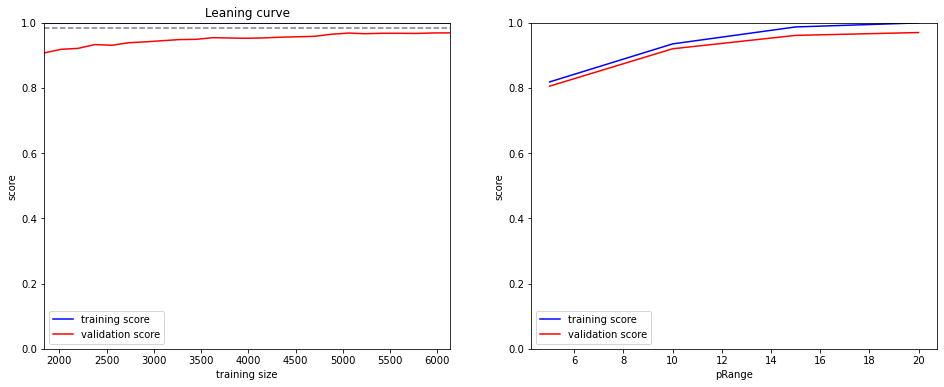

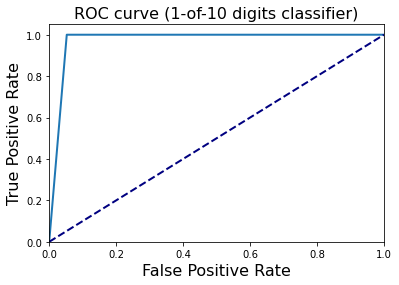

RandomForestClassifier-minmaxSmote
score on train data with RandomForestClassifier-minmaxSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-minmaxSmote  : 0.987845766974015
---------------------------------------------------------------------------------------
preceision:  0.9764801297648013
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-minmaxSmote )

            Not one     One 
    Not one  1153.0    29.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1153   29]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9877326565143825
------------

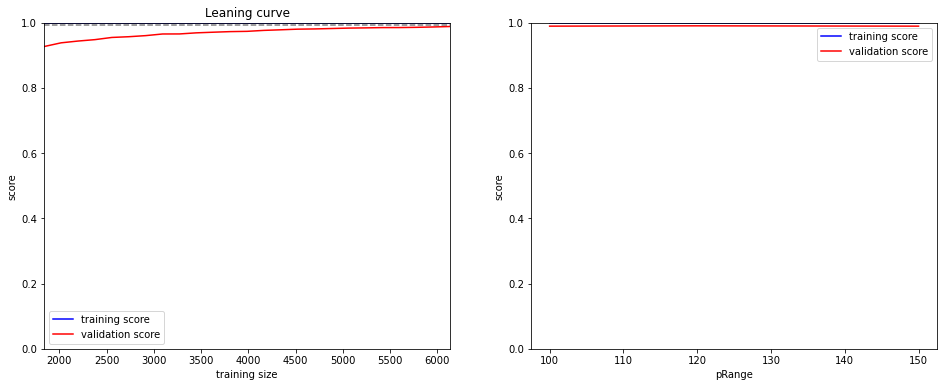

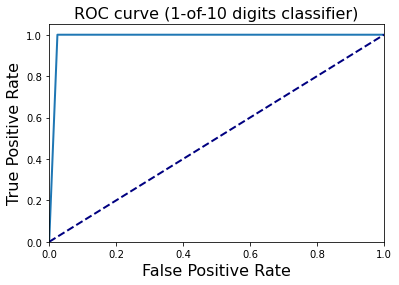

AdaBoostClassifier-minmaxSmote
score on train data with AdaBoostClassifier-minmaxSmote  : 0.7964515227717239
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-minmaxSmote  : 0.8021793797150042
---------------------------------------------------------------------------------------
preceision:  0.775187969924812
---------------------------------------------------------------------------------------
recall:  0.856312292358804
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-minmaxSmote )

            Not one     One 
    Not one   883.0   299.0 
        One   173.0  1031.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 883  299]
 [ 173 1031]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8016756047242413

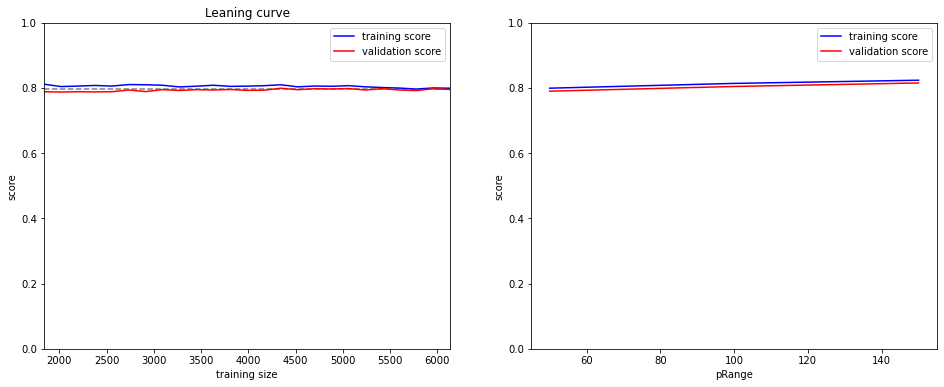

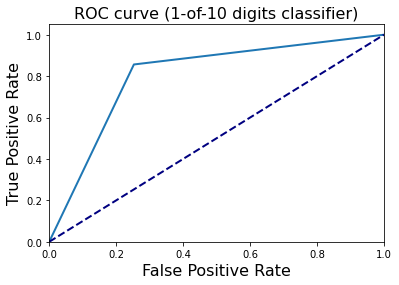

In [68]:
models('DummyClassifier-minmaxSmote',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-minmaxSmote',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-minmaxSmote',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-minmaxSmote',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-minmaxSmote',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-minmaxSmote',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-minmaxSmote',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-minmaxSmote',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100,150])

let's try feature selection with scaler(standard)

In [69]:
results.to_csv('results.csv') 

In [70]:
x_train_scaled_standard_percentile , x_test_scaled_standard_percentile = selectionFeature(SelectPercentile(percentile=50),x_train_scaled_standard,y_train_copy,x_test_scaled_standard)

X_train.shape: (7158, 18)
X_train_selected.shape: (7158, 9)


In [71]:
x_train_copy = x_train_scaled_standard_percentile
x_test_copy = x_test_scaled_standard_percentile

DummyClassifier-scaledspCopy
score on train data with DummyClassifier-scaledspCopy  : 0.507264599050014
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-scaledspCopy  : 0.4953897736797988
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-scaledspCopy )

            Not one     One 
    Not one  1182.0     0.0 
        One  1204.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1182    0]
 [1204    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
---------------------------------------------------

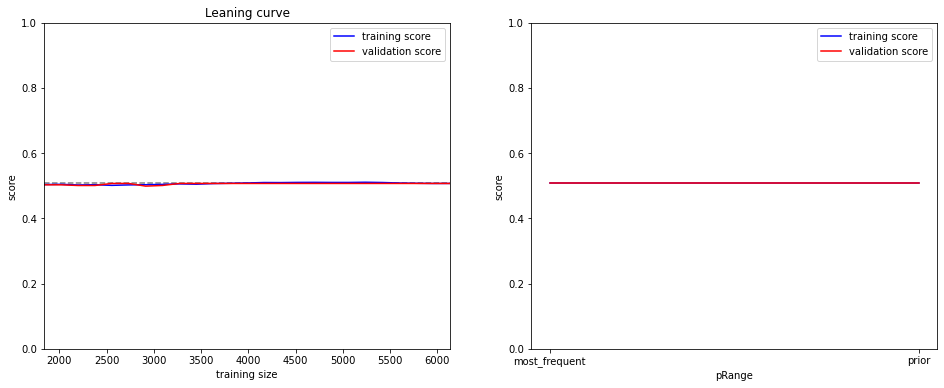

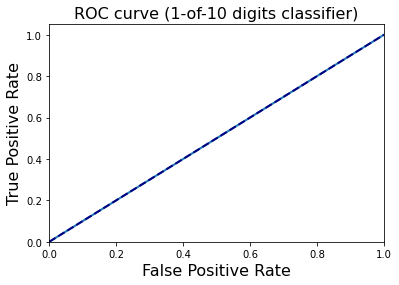

logistic regression-scaledspCopy
score on train data with logistic regression-scaledspCopy  : 0.767532830399553
---------------------------------------------------------------------------------------
score on test data with  logistic regression-scaledspCopy  : 0.7690695725062867
---------------------------------------------------------------------------------------
preceision:  0.7572892040977147
---------------------------------------------------------------------------------------
recall:  0.7981727574750831
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-scaledspCopy )

            Not one     One 
    Not one   874.0   308.0 
        One   243.0   961.0 
---------------------------------------------------------------------------------------
classification report:
 [[874 308]
 [243 961]]
---------------------------------------------------------------------------------------
Test set AUC:  0.76879873068

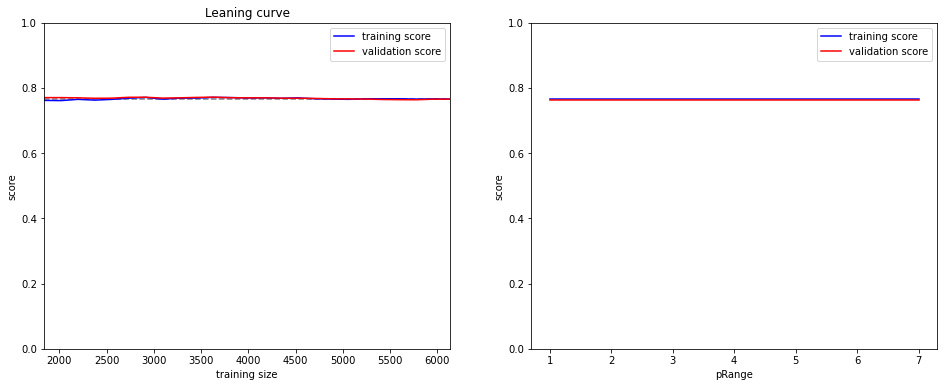

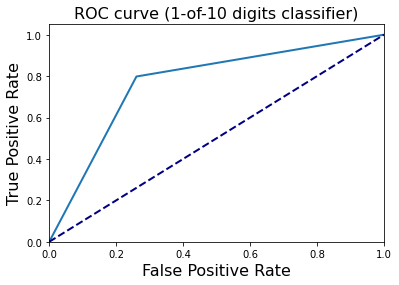

knn-scaledspCopy
score on train data with knn-scaledspCopy  : 0.9491478066499022
---------------------------------------------------------------------------------------
score on test data with  knn-scaledspCopy  : 0.9237217099748533
---------------------------------------------------------------------------------------
preceision:  0.8686868686868687
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( knn-scaledspCopy )

            Not one     One 
    Not one  1000.0   182.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1000  182]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9230118443316413
--------------------------------------------------------------------

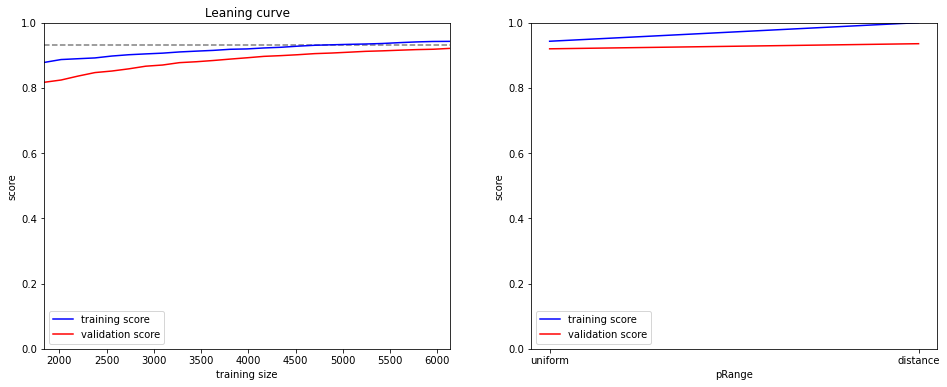

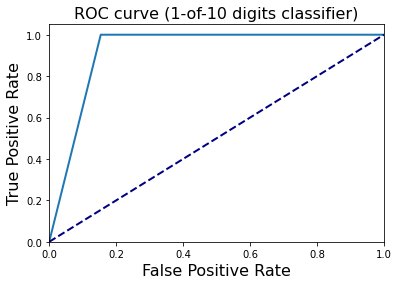

guassianNB-scaledspCopy
score on train data with guassianNB-scaledspCopy  : 0.7330259849119866
---------------------------------------------------------------------------------------
score on test data with  guassianNB-scaledspCopy  : 0.7242246437552389
---------------------------------------------------------------------------------------
preceision:  0.6832214765100671
---------------------------------------------------------------------------------------
recall:  0.845514950166113
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-scaledspCopy )

            Not one     One 
    Not one   710.0   472.0 
        One   186.0  1018.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 710  472]
 [ 186 1018]]
---------------------------------------------------------------------------------------
Test set AUC:  0.7230958845585218
--------------------------

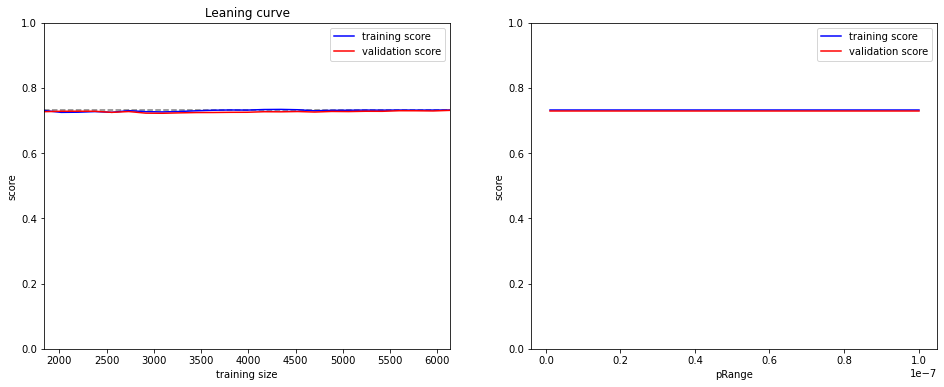

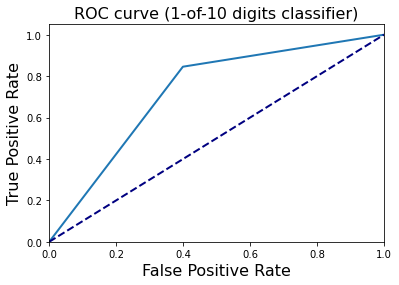

support vector machine-scaledspCopy
score on train data with support vector machine-scaledspCopy  : 0.7930986309024868
---------------------------------------------------------------------------------------
score on test data with  support vector machine-scaledspCopy  : 0.7921207041072925
---------------------------------------------------------------------------------------
preceision:  0.7752721617418351
---------------------------------------------------------------------------------------
recall:  0.8280730897009967
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-scaledspCopy )

            Not one     One 
    Not one   893.0   289.0 
        One   207.0   997.0 
---------------------------------------------------------------------------------------
classification report:
 [[893 289]
 [207 997]]
---------------------------------------------------------------------------------------
Test set AUC:  

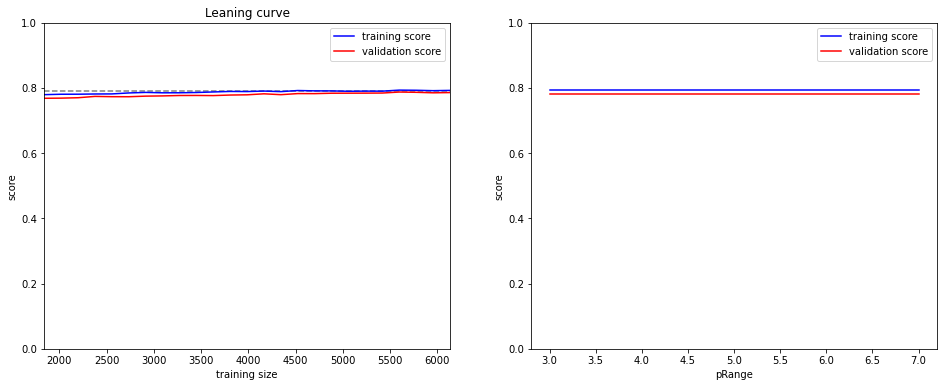

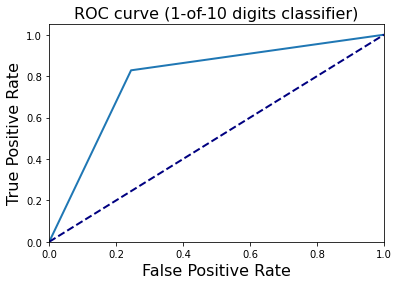

DecisionTree Classifier-scaledspCopy
score on train data with DecisionTree Classifier-scaledspCopy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-scaledspCopy  : 0.9765297569153395
---------------------------------------------------------------------------------------
preceision:  0.9555555555555556
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-scaledspCopy )

            Not one     One 
    Not one  1126.0    56.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1126   56]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9763113367174281
---

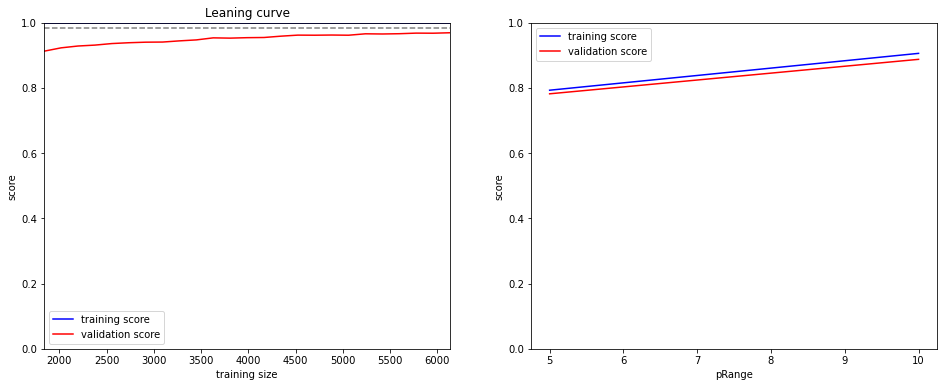

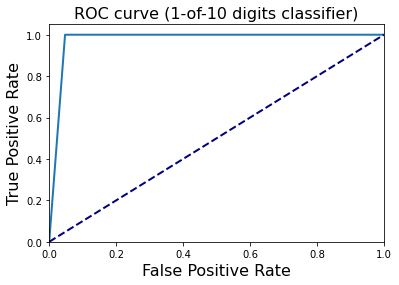

RandomForestClassifier-scaledspCopy
score on train data with RandomForestClassifier-scaledspCopy  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-scaledspCopy  : 0.9769488683989941
---------------------------------------------------------------------------------------
preceision:  0.9563145353455124
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-scaledspCopy )

            Not one     One 
    Not one  1127.0    55.0 
        One     0.0  1204.0 
---------------------------------------------------------------------------------------
classification report:
 [[1127   55]
 [   0 1204]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9767343485617597
-------

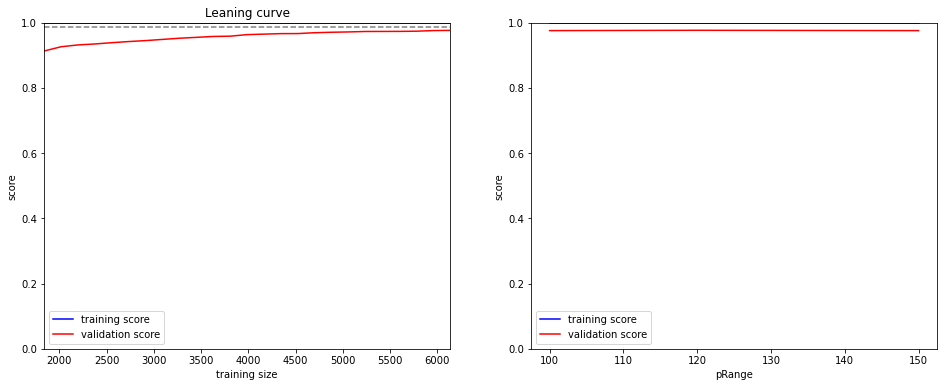

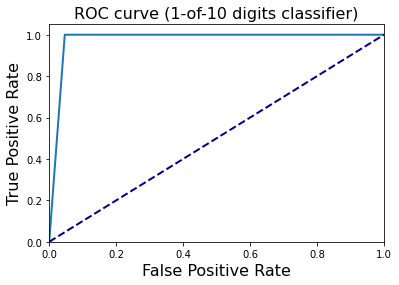

AdaBoostClassifier-scaledspCopy
score on train data with AdaBoostClassifier-scaledspCopy  : 0.7896060352053647
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-scaledspCopy  : 0.7954735959765298
---------------------------------------------------------------------------------------
preceision:  0.763235294117647
---------------------------------------------------------------------------------------
recall:  0.8621262458471761
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-scaledspCopy )

            Not one     One 
    Not one   860.0   322.0 
        One   166.0  1038.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 860  322]
 [ 166 1038]]
---------------------------------------------------------------------------------------
Test set AUC:  0.79485330904

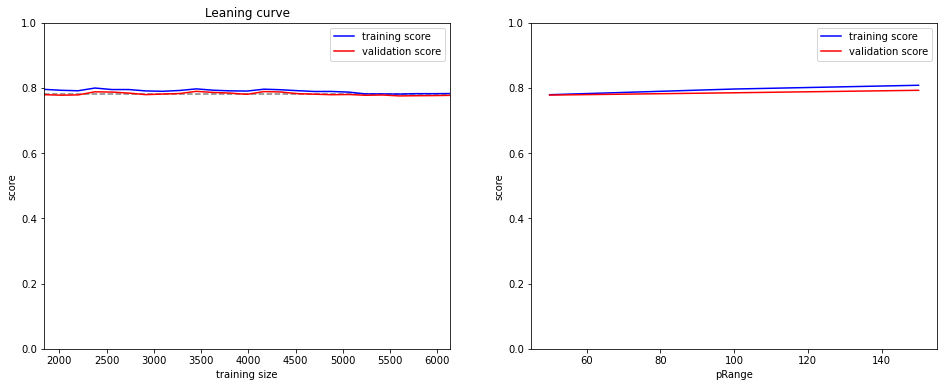

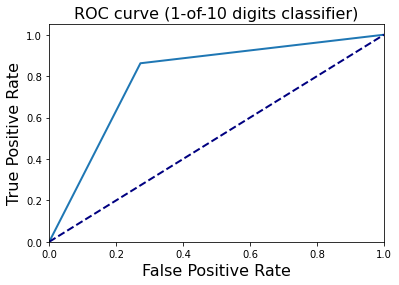

In [72]:
models('DummyClassifier-scaledspCopy',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-scaledspCopy',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-scaledspCopy',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-scaledspCopy',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-scaledspCopy',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-scaledspCopy',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10])
models('RandomForestClassifier-scaledspCopy',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-scaledspCopy',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100,150])

let's try feature selection only

In [73]:
results.to_csv('results1.csv') 

In [ ]:
# x_train_copy =x_train_selected_percentile
# x_test_copy = x_test_selected_percentile

In [ ]:
models('DummyClassifier-spCopy',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-spCopy',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-spCopy',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-spCopy',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-spCopy',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3])
models('DecisionTree Classifier-spCopy',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[10])
models('RandomForestClassifier-spCopy',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100])
models('AdaBoostClassifier-spCopy',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[100])

DummyClassifier
score on train data with DummyClassifier  : 0.5052821795941062
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.5112593828190158
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1226.0     0.0 
        One  1172.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1226    0]
 [1172    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

logistic regression
score on train data with logistic regression  : 0.7717542396441479
---------------------------------------------------------------------------------------
score on test data with  logistic regression  : 0.7673060884070059
---------------------------------------------------------------------------------------
preceision:  0.7421135646687698
---------------------------------------------------------------------------------------
recall:  0.802901023890785
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression )

            Not one     One 
    Not one   899.0   327.0 
        One   231.0   941.0 
---------------------------------------------------------------------------------------
classification report:
 [[899 327]
 [231 941]]
knn
score on train data with knn  : 0.9492632749513483
---------------------------------------------------------------------------------------
score on test data with  

let's try another feature selection 

In [ ]:
# x_train_copy =x_train_selected_RandomForest
# x_test_copy = x_test_selected_RandomForest

In [ ]:
models('DummyClassifier-rfCopy',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-rfCopy',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-rfCopy',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-rfCopy',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-rfCopy',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3])
models('DecisionTree Classifier-rfCopy',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[10])
models('RandomForestClassifier-rfCopy',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100])
models('AdaBoostClassifier-rfCopy',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[100])

DummyClassifier
score on train data with DummyClassifier  : 0.5052821795941062
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.5112593828190158
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1226.0     0.0 
        One  1172.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1226    0]
 [1172    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

logistic regression
score on train data with logistic regression  : 0.7709202112871838
---------------------------------------------------------------------------------------
score on test data with  logistic regression  : 0.768557130942452
---------------------------------------------------------------------------------------
preceision:  0.7427222659323367
---------------------------------------------------------------------------------------
recall:  0.8054607508532423
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression )

            Not one     One 
    Not one   899.0   327.0 
        One   228.0   944.0 
---------------------------------------------------------------------------------------
classification report:
 [[899 327]
 [228 944]]
knn
score on train data with knn  : 0.9485682513205449
---------------------------------------------------------------------------------------
score on test data with  

In [ ]:
# x_train_copy =x_train_selected_RFE
# x_test_copy = x_test_selected_RFE

another feature selection REF

In [ ]:
models('DummyClassifier-refCopy',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-refCopy',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-refSmote',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-refCopy',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-refCopy',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-refCopy',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10])
models('RandomForestClassifier-refCopy',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-refCopy',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100,150])

DummyClassifier
score on train data with DummyClassifier  : 0.5052821795941062
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.5112593828190158
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1226.0     0.0 
        One  1172.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1226    0]
 [1172    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

logistic regression
score on train data with logistic regression  : 0.7757853767028079
---------------------------------------------------------------------------------------
score on test data with  logistic regression  : 0.7714762301918265
---------------------------------------------------------------------------------------
preceision:  0.7476190476190476
---------------------------------------------------------------------------------------
recall:  0.8037542662116041
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression )

            Not one     One 
    Not one   908.0   318.0 
        One   230.0   942.0 
---------------------------------------------------------------------------------------
classification report:
 [[908 318]
 [230 942]]
knn
score on train data with knn  : 0.9487072560467056
---------------------------------------------------------------------------------------
score on test data with 

another feature selection(kBest)

In [ ]:
x_train_copy =x_train_selected_KBest
x_test_copy = x_test_selected_KBest

In [ ]:
models('DummyClassifier-kbestCopy',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-kbestCopy',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-kbestCopy',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-kbestCopy',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-kbestCopy',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-kbestCopy',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10])
models('RandomForestClassifier-kbestCopy',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-kbestCopy',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100,150])

DummyClassifier
score on train data with DummyClassifier  : 0.5052821795941062
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.5112593828190158
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1226.0     0.0 
        One  1172.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1226    0]
 [1172    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

logistic regression
score on train data with logistic regression  : 0.7686961356686127
---------------------------------------------------------------------------------------
score on test data with  logistic regression  : 0.7652210175145955
---------------------------------------------------------------------------------------
preceision:  0.7426294820717132
---------------------------------------------------------------------------------------
recall:  0.7952218430034129
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression )

            Not one     One 
    Not one   903.0   323.0 
        One   240.0   932.0 
---------------------------------------------------------------------------------------
classification report:
 [[903 323]
 [240 932]]
knn
score on train data with knn  : 0.9477342229635808
---------------------------------------------------------------------------------------
score on test data with 

try feature selection with another scaler

In [74]:
x_train_scaled_MinMax_KBest , x_test_scaled_MinMax_KBest = selectionFeature(SelectKBest(chi2,k=9),x_train_scaled_MinMax,y_train_copy,x_test_scaled_MinMax)

X_train.shape: (7158, 18)
X_train_selected.shape: (7158, 9)


In [75]:
x_train_copy =x_train_scaled_MinMax_KBest
x_test_copy = x_test_scaled_MinMax_KBest

In [ ]:
models('DummyClassifier-minmaxkbestCopy',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-minmaxkbestCopy',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-minmaxkbestCopy',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-minmaxkbestCopy',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-minmaxkbestCopy',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-minmaxkbestCopy',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10])
models('RandomForestClassifier-minmaxkbestCopy',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-minmaxkbestCopy',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100,150])

DummyClassifier
score on train data with DummyClassifier  : 0.5052821795941062
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.5112593828190158
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1226.0     0.0 
        One  1172.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1226    0]
 [1172    0]]
logistic regression
score on train data with logistic regression  : 0.7646649986099527
---------------------------------------------------------------------------------------
score on test data with  logistic 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

knn
score on train data with knn  : 0.9495412844036697
---------------------------------------------------------------------------------------
score on test data with  knn  : 0.9253544620517098
---------------------------------------------------------------------------------------
preceision:  0.8675055514433753
---------------------------------------------------------------------------------------
recall:  1.0
---------------------------------------------------------------------------------------
Most frequent class ( knn )

            Not one     One 
    Not one  1047.0   179.0 
        One     0.0  1172.0 
---------------------------------------------------------------------------------------
classification report:
 [[1047  179]
 [   0 1172]]
guassianNB
score on train data with guassianNB  : 0.7332499304976369
---------------------------------------------------------------------------------------
score on test data with  guassianNB  : 0.7222685571309424
---------------------------

let's try another solution 
SMOTE

In [77]:
input_oneHatEn = datasetWithOnehatEncoding.drop('stroke',axis =1)
output_oneHatEn  = datasetWithOnehatEncoding['stroke']
input_oneHatEn  = np.asarray(input_oneHatEn)
output_oneHatEn = np.asarray(output_oneHatEn)

In [78]:
sm = SMOTE(random_state=2)
x_res, y_res = sm.fit_resample(input_oneHatEn,output_oneHatEn.ravel())

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,random_state=0,shuffle =True)

In [80]:
print(f'x_train', x_train.shape)
print(f'y_train',y_train.shape)
print(f'x_test',x_test.shape)
print(f'y_test',y_test.shape)

x_train (7219, 18)
y_train (7219,)
x_test (2407, 18)
y_test (2407,)


In [82]:
print('After OverSampling, the shape of train_x: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train == 0)))

After OverSampling, the shape of train_x: (7219, 18)
After OverSampling, the shape of train_y: (7219,)
After OverSampling, counts of label 1: 3591
After OverSampling, counts of label 0: 3628


without scales and featurefof
fors77

In [83]:
x_train_copy = x_train
y_train_copy = y_train
x_test_copy = x_test
y_test_copy = y_test

DummyClassifier-Smote
score on train data with DummyClassifier-Smote  : 0.5025626818118853
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-Smote  : 0.49231408392189446
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-Smote )

            Not one     One 
    Not one  1185.0     0.0 
        One  1222.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1185    0]
 [1222    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
-----------------------------------------------------------------------------

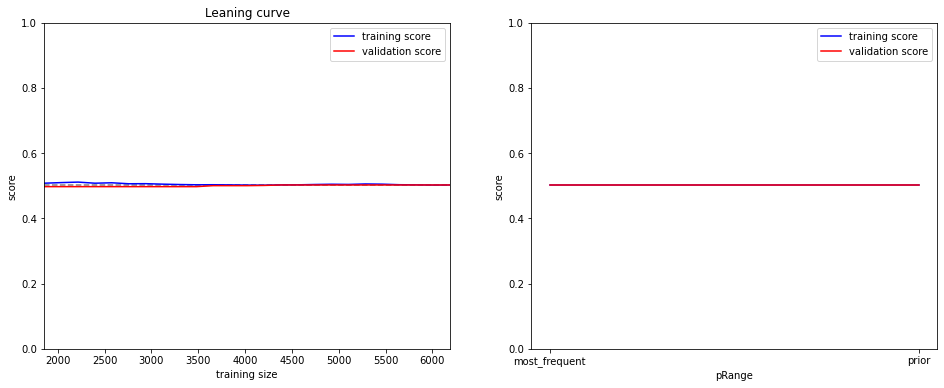

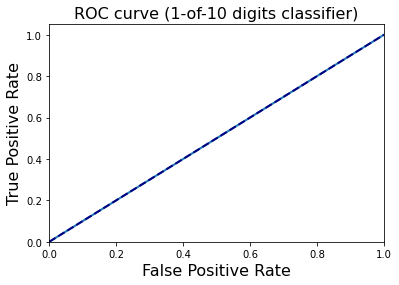

logistic regression-Smote
score on train data with logistic regression-Smote  : 0.7862584845546474
---------------------------------------------------------------------------------------
score on test data with  logistic regression-Smote  : 0.7735770668882426
---------------------------------------------------------------------------------------
preceision:  0.7539384846211553
---------------------------------------------------------------------------------------
recall:  0.8224222585924713
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-Smote )

            Not one     One 
    Not one   857.0   328.0 
        One   217.0  1005.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 857  328]
 [ 217 1005]]
---------------------------------------------------------------------------------------
Test set AUC:  0.7728145048236619
-----------------

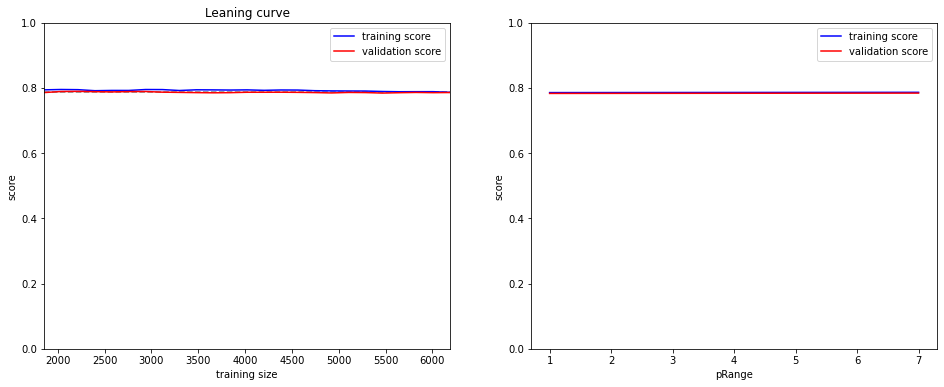

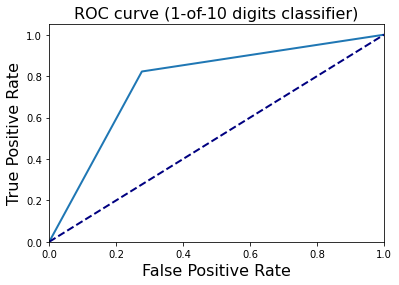

knn-Smote
score on train data with knn-Smote  : 0.9296301426790414
---------------------------------------------------------------------------------------
score on test data with  knn-Smote  : 0.8869962609056917
---------------------------------------------------------------------------------------
preceision:  0.8383190883190883
---------------------------------------------------------------------------------------
recall:  0.9631751227495908
---------------------------------------------------------------------------------------
Most frequent class ( knn-Smote )

            Not one     One 
    Not one   958.0   227.0 
        One    45.0  1177.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 958  227]
 [  45 1177]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8858069706574958
---------------------------------------------------------------------------------

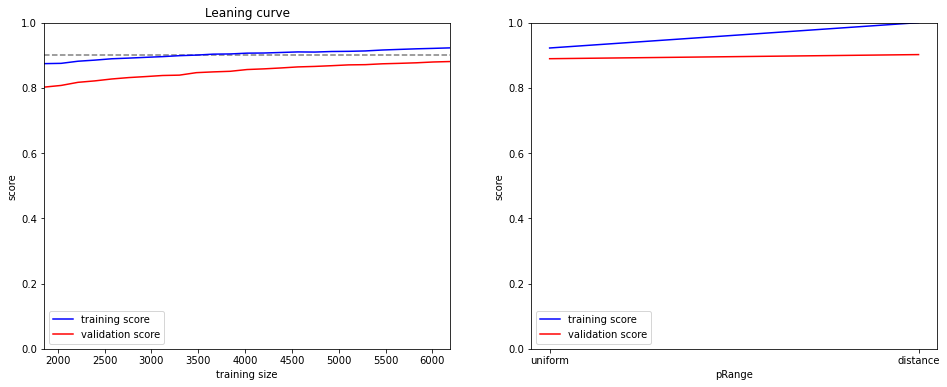

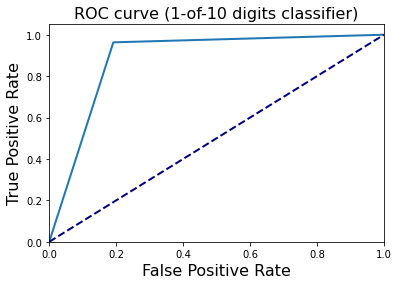

guassianNB-Smote
score on train data with guassianNB-Smote  : 0.6431638731126195
---------------------------------------------------------------------------------------
score on test data with  guassianNB-Smote  : 0.6464478604071459
---------------------------------------------------------------------------------------
preceision:  0.5900922778047596
---------------------------------------------------------------------------------------
recall:  0.9942716857610474
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-Smote )

            Not one     One 
    Not one   341.0   844.0 
        One     7.0  1215.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 341  844]
 [   7 1215]]
---------------------------------------------------------------------------------------
Test set AUC:  0.641017699420608
------------------------------------------------------

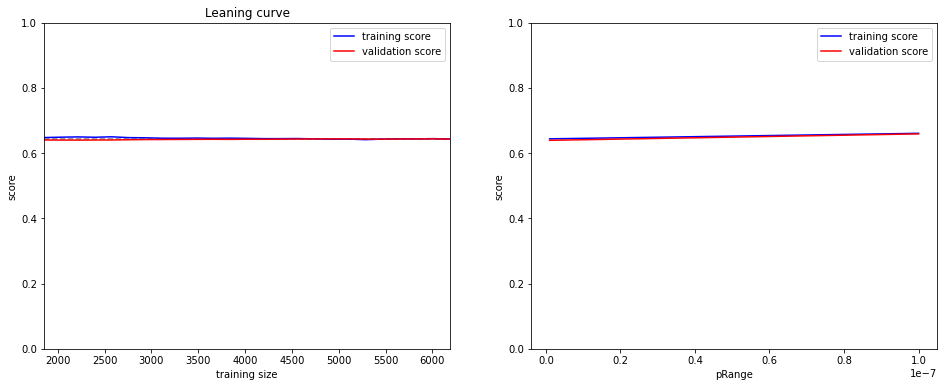

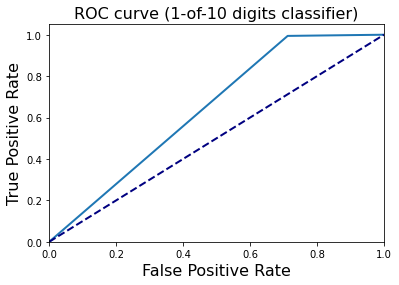

support vector machine-Smote
score on train data with support vector machine-Smote  : 0.8560742485108741
---------------------------------------------------------------------------------------
score on test data with  support vector machine-Smote  : 0.8462816784378895
---------------------------------------------------------------------------------------
preceision:  0.8073593073593074
---------------------------------------------------------------------------------------
recall:  0.9157119476268413
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-Smote )

            Not one     One 
    Not one   918.0   267.0 
        One   103.0  1119.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 918  267]
 [ 103 1119]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8451977459653195
-----

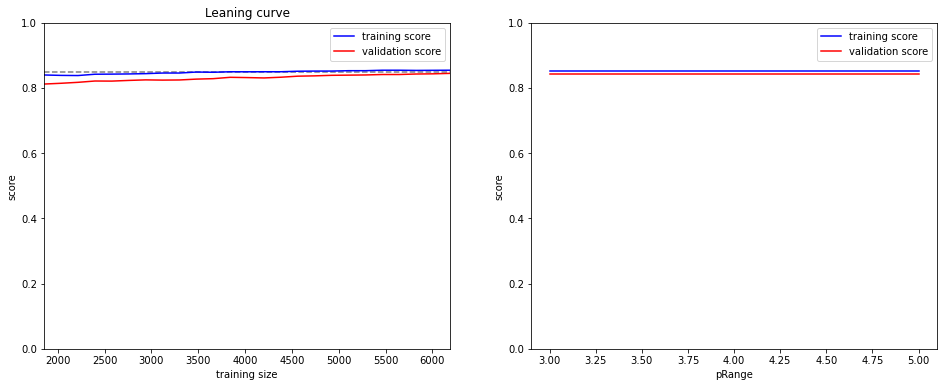

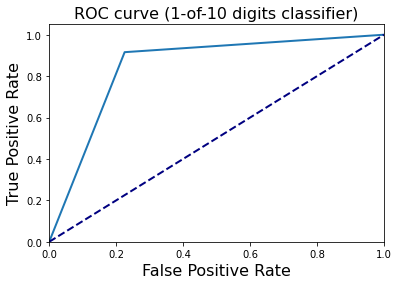

DecisionTree Classifier-Smote
score on train data with DecisionTree Classifier-Smote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-Smote  : 0.8691316992106356
---------------------------------------------------------------------------------------
preceision:  0.8678021086780211
---------------------------------------------------------------------------------------
recall:  0.8756137479541735
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-Smote )

            Not one     One 
    Not one  1022.0   163.0 
        One   152.0  1070.0 
---------------------------------------------------------------------------------------
classification report:
 [[1022  163]
 [ 152 1070]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8690305026690699
----------------

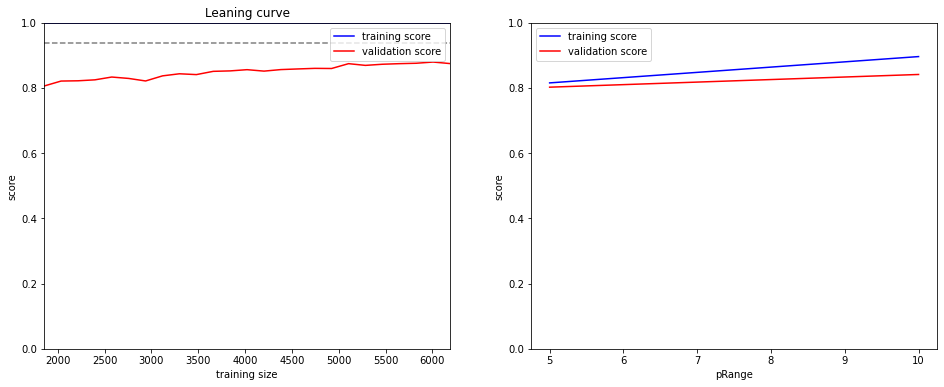

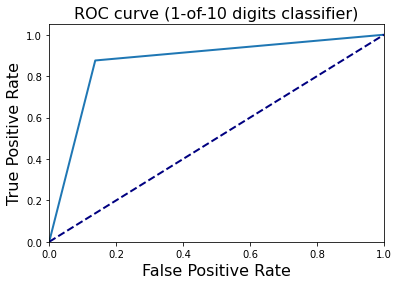

RandomForestClassifier-Smote
score on train data with RandomForestClassifier-Smote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-Smote  : 0.9331117573743248
---------------------------------------------------------------------------------------
preceision:  0.9141295862607338
---------------------------------------------------------------------------------------
recall:  0.9582651391162029
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-Smote )

            Not one     One 
    Not one  1075.0   110.0 
        One    51.0  1171.0 
---------------------------------------------------------------------------------------
classification report:
 [[1075  110]
 [  51 1171]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9327190674483968
--------------------

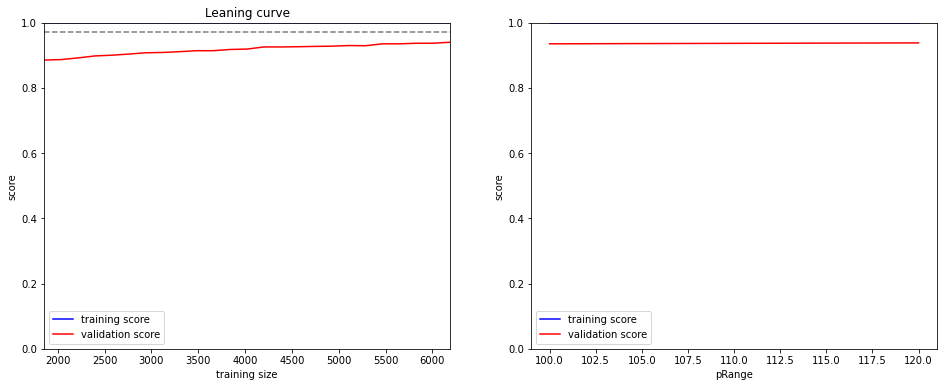

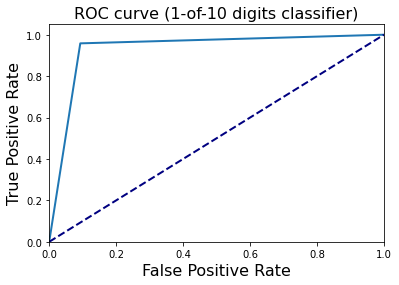

AdaBoostClassifier-Smote
score on train data with AdaBoostClassifier-Smote  : 0.8347416539686937
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-Smote  : 0.8238471125882841
---------------------------------------------------------------------------------------
preceision:  0.794682422451994
---------------------------------------------------------------------------------------
recall:  0.8805237315875614
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-Smote )

            Not one     One 
    Not one   907.0   278.0 
        One   146.0  1076.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 907  278]
 [ 146 1076]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8229622877347088
----------------------

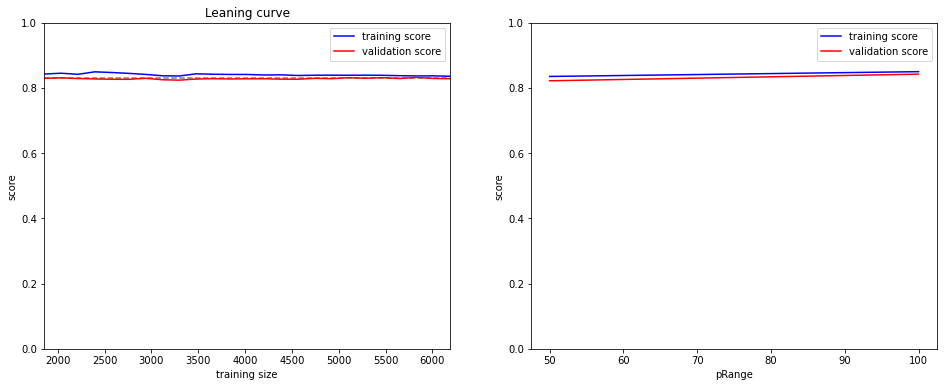

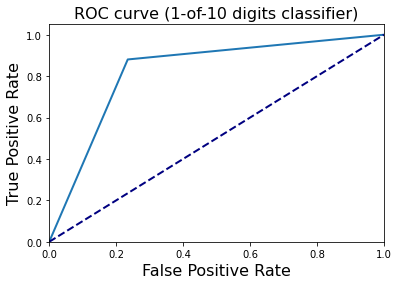

In [84]:
models('DummyClassifier-Smote',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-Smote',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-Smote',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-Smote',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-Smote',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3,5])
models('DecisionTree Classifier-Smote',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10])
models('RandomForestClassifier-Smote',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120])
models('AdaBoostClassifier-Smote',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100])

In [88]:
x_train_scaled_standard_smote,x_test_scaled_standard_smote = scale(StandardScaler(),x_train,x_test)
x_train_scaled_MinMax_smote,x_test_scaled_MinMax_smote = scale(MinMaxScaler(),x_train,x_test)
x_train_scaled_Robust_smote,x_test_scaled_Robust_smote = scale(RobustScaler(),x_train,x_test)
x_train_selected_percentile_smote,x_test_selected_percentile_smote = selectionFeature(SelectPercentile(percentile=50),x_train,y_train,x_test)
x_train_selected_KBest_smote,x_test_selected_KBest_smote = selectionFeature(SelectKBest(chi2,k=9),x_train,y_train,x_test)
x_train_selected_GenericUnivariate_smote,x_test_selected_GenericUnivariate_smote = selectionFeature(GenericUnivariateSelect(chi2, mode='k_best', param=10),x_train,y_train,x_test)
x_train_selected_RandomForest_smote,x_test_selected_RandomForest_smote = selectionFeature(SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"),x_train,y_train,x_test)
x_train_selected_RFE_smote ,x_test_selected_RFE_smote = rfe(x_train,y_train,x_test,10)

X_train.shape: (7219, 18)
X_train_scaled.shape: (7219, 18)
X_train.shape: (7219, 18)
X_train_scaled.shape: (7219, 18)
X_train.shape: (7219, 18)
X_train_scaled.shape: (7219, 18)
X_train.shape: (7219, 18)
X_train_selected.shape: (7219, 9)
X_train.shape: (7219, 18)
X_train_selected.shape: (7219, 9)
X_train.shape: (7219, 18)
X_train_selected.shape: (7219, 10)
X_train.shape: (7219, 18)
X_train_selected.shape: (7219, 9)
X_train.shape: (7219, 18)
X_train_selected.shape: (7219, 10)


let's try out data after smote with scaler and feature selection

In [90]:
x_train_copy = x_train_scaled_standard_smote
y_train_copy = y_train
x_test_copy = x_test_scaled_standard_smote
y_test_copy = y_test

DummyClassifier-scaledSmote
score on train data with DummyClassifier-scaledSmote  : 0.5025626818118853
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-scaledSmote  : 0.49231408392189446
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-scaledSmote )

            Not one     One 
    Not one  1185.0     0.0 
        One  1222.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1185    0]
 [1222    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
-----------------------------------------------------

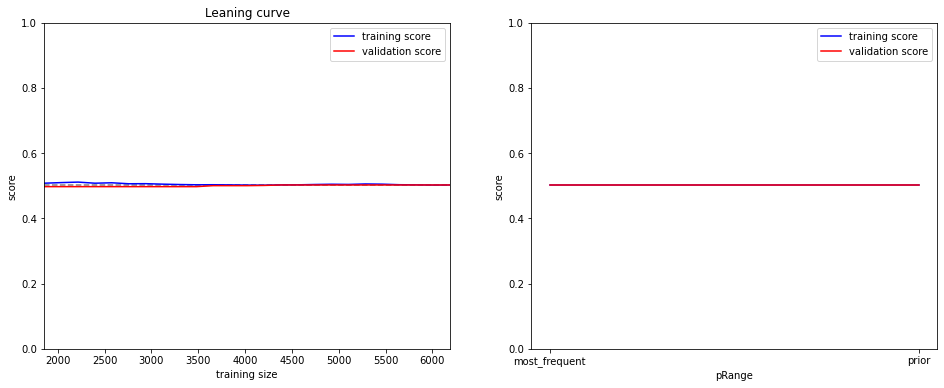

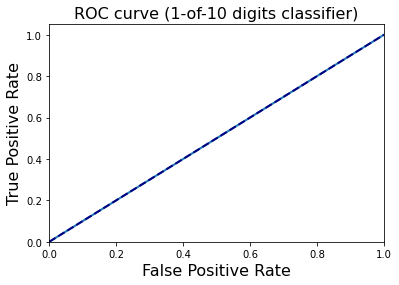

logistic regression-scaledSmote
score on train data with logistic regression-scaledSmote  : 0.7861199612134645
---------------------------------------------------------------------------------------
score on test data with  logistic regression-scaledSmote  : 0.7748234316576651
---------------------------------------------------------------------------------------
preceision:  0.7560240963855421
---------------------------------------------------------------------------------------
recall:  0.8216039279869067
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-scaledSmote )

            Not one     One 
    Not one   861.0   324.0 
        One   218.0  1004.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 861  324]
 [ 218 1004]]
---------------------------------------------------------------------------------------
Test set AUC:  0.7740931032

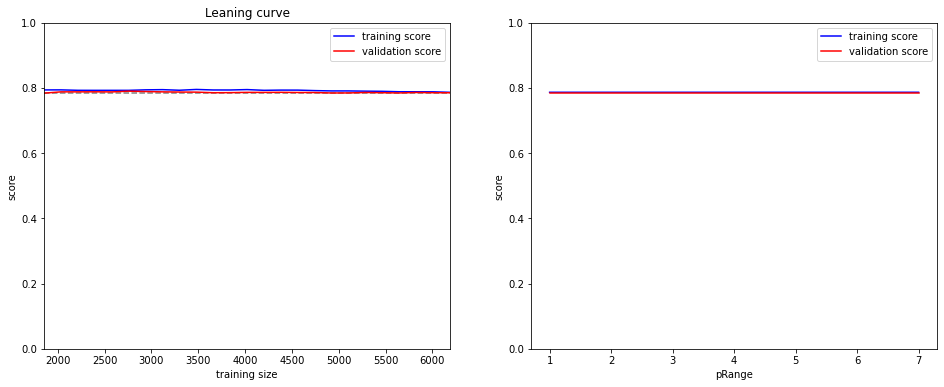

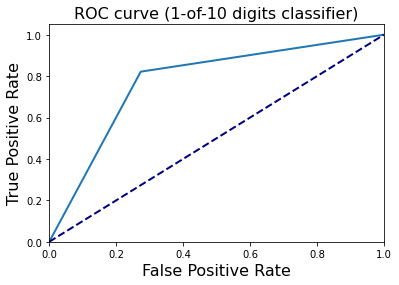

knn-scaledSmote
score on train data with knn-scaledSmote  : 0.9260285358082837
---------------------------------------------------------------------------------------
score on test data with  knn-scaledSmote  : 0.8919817199833818
---------------------------------------------------------------------------------------
preceision:  0.8377808988764045
---------------------------------------------------------------------------------------
recall:  0.9762684124386252
---------------------------------------------------------------------------------------
Most frequent class ( knn-scaledSmote )

            Not one     One 
    Not one   954.0   231.0 
        One    29.0  1193.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 954  231]
 [  29 1193]]
---------------------------------------------------------------------------------------
Test set AUC:  0.8906658517889328
---------------------------------------------------------

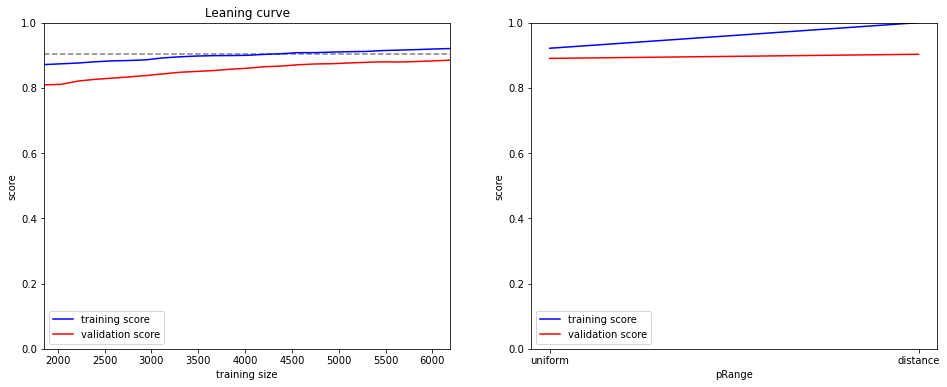

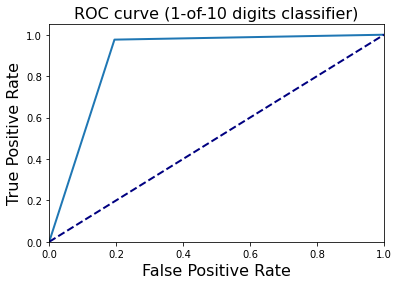

guassianNB-scaledSmote
score on train data with guassianNB-scaledSmote  : 0.6265410721706608
---------------------------------------------------------------------------------------
score on test data with  guassianNB-scaledSmote  : 0.6310760282509348
---------------------------------------------------------------------------------------
preceision:  0.5795996186844614
---------------------------------------------------------------------------------------
recall:  0.9950900163666121
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-scaledSmote )

            Not one     One 
    Not one   303.0   882.0 
        One     6.0  1216.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 303  882]
 [   6 1216]]
---------------------------------------------------------------------------------------
Test set AUC:  0.6253931094491288
-----------------------------

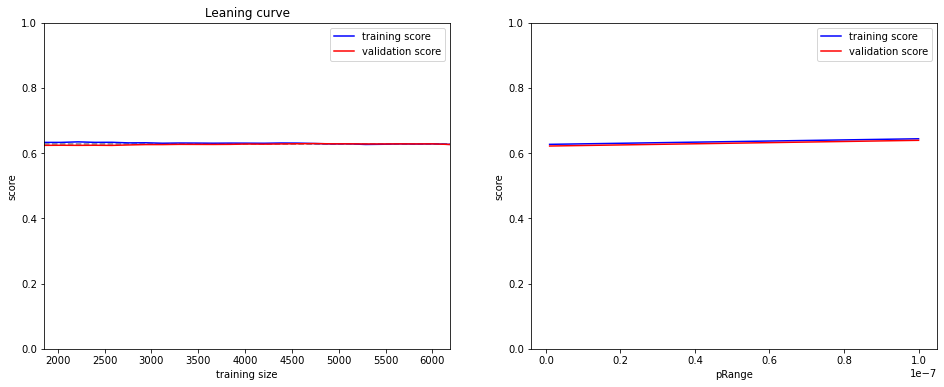

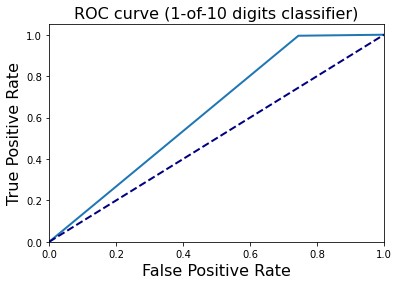

support vector machine-scaledSmote
score on train data with support vector machine-scaledSmote  : 0.8786535531237013
---------------------------------------------------------------------------------------
score on test data with  support vector machine-scaledSmote  : 0.8624844204403822
---------------------------------------------------------------------------------------
preceision:  0.8221258134490239
---------------------------------------------------------------------------------------
recall:  0.9304418985270049
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-scaledSmote )

            Not one     One 
    Not one   939.0   246.0 
        One    85.0  1137.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 939  246]
 [  85 1137]]
---------------------------------------------------------------------------------------
Test set AUC:  

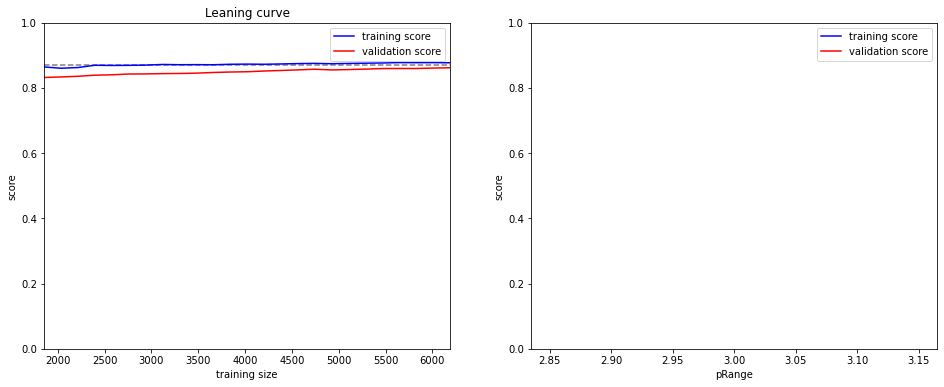

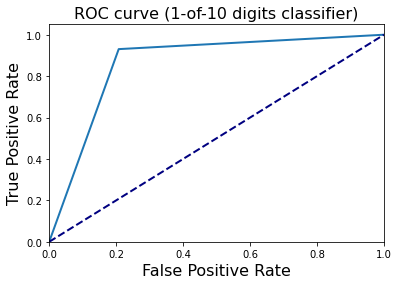

DecisionTree Classifier-scaledSmote
score on train data with DecisionTree Classifier-scaledSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-scaledSmote  : 0.8691316992106356
---------------------------------------------------------------------------------------
preceision:  0.8678021086780211
---------------------------------------------------------------------------------------
recall:  0.8756137479541735
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-scaledSmote )

            Not one     One 
    Not one  1022.0   163.0 
        One   152.0  1070.0 
---------------------------------------------------------------------------------------
classification report:
 [[1022  163]
 [ 152 1070]]
---------------------------------------------------------------------------------------
Test set AUC:  0.869030502

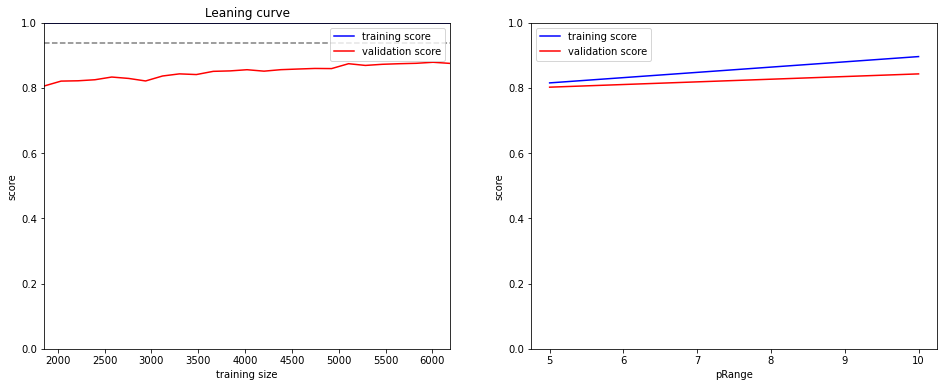

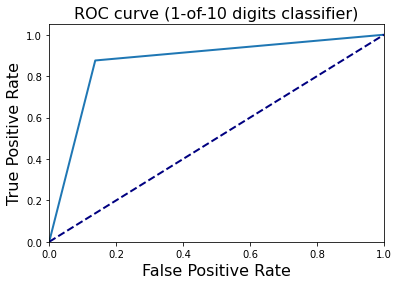

RandomForestClassifier-scaledSmote
score on train data with RandomForestClassifier-scaledSmote  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-scaledSmote  : 0.9322808475280432
---------------------------------------------------------------------------------------
preceision:  0.9133489461358314
---------------------------------------------------------------------------------------
recall:  0.9574468085106383
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-scaledSmote )

            Not one     One 
    Not one  1074.0   111.0 
        One    52.0  1170.0 
---------------------------------------------------------------------------------------
classification report:
 [[1074  111]
 [  52 1170]]
---------------------------------------------------------------------------------------
Test set AUC:  0.9318879612173

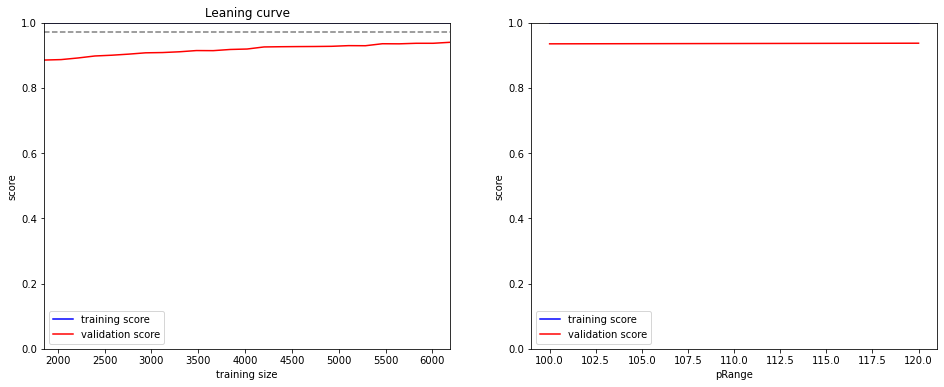

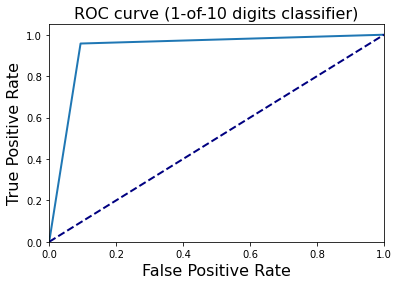

AdaBoostClassifier-scaledSmote
score on train data with AdaBoostClassifier-scaledSmote  : 0.8347416539686937
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-scaledSmote  : 0.8238471125882841
---------------------------------------------------------------------------------------
preceision:  0.794682422451994
---------------------------------------------------------------------------------------
recall:  0.8805237315875614
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-scaledSmote )

            Not one     One 
    Not one   907.0   278.0 
        One   146.0  1076.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 907  278]
 [ 146 1076]]
---------------------------------------------------------------------------------------
Test set AUC:  0.822962287734708

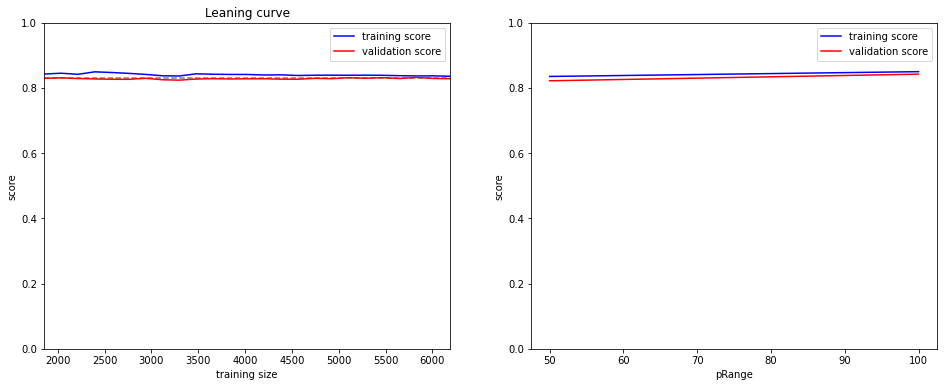

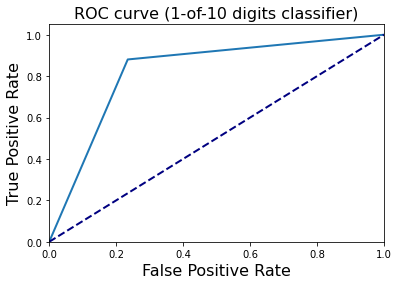

In [91]:
models('DummyClassifier-scaledSmote',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-scaledSmote',LogisticRegression(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-scaledSmote',KNeighborsClassifier(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-scaledSmote',GaussianNB(),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-scaledSmote',SVC(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3])
models('DecisionTree Classifier-scaledSmote',DecisionTreeClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10])
models('RandomForestClassifier-scaledSmote',RandomForestClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120])
models('AdaBoostClassifier-scaledSmote',AdaBoostClassifier(random_state=0),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100])

In [ ]:
models('DummyClassifier',DummyClassifier(strategy = 'most_frequent'),x_train_selected_KBest_smote,y_train_res,x_test_selected_KBest_smote,y_test)
models('logistic regression',LogisticRegression(random_state=0),x_train_selected_KBest_smote,y_train_res,x_test_selected_KBest_smote,y_test)
models('knn',KNeighborsClassifier(),x_train_selected_KBest_smote,y_train_res,x_test_selected_KBest_smote,y_test)
models('guassianNB',GaussianNB(),x_train_selected_KBest_smote,y_train_res,x_test_selected_KBest_smote,y_test)
models('support vector machine',SVC(random_state=0),x_train_selected_KBest_smote,y_train_res,x_test_selected_KBest_smote,y_test)
models('DecisionTree Classifier',DecisionTreeClassifier(random_state=0),x_train_selected_KBest_smote,y_train_res,x_test_selected_KBest_smote,y_test)
models('RandomForestClassifier',RandomForestClassifier(random_state=0),x_train_selected_KBest_smote,y_train_res,x_test_selected_KBest_smote,y_test)
models('AdaBoostClassifier',AdaBoostClassifier(random_state=0),x_train_selected_KBest_smote,y_train_res,x_test_selected_KBest_smote,y_test)

let's tuning the model before complete this :

1. logistic regression

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 

In [93]:
def findBestParameter(nameOftheClassifier,classifier,param_grid,cv,x_train,y_train,x_test,y_test):
  grid = GridSearchCV(classifier, param_grid, cv=3, scoring = 'accuracy')
  grid.fit(x_train, y_train)
  
  print('Grid best parameter (max. accuracy): ', grid.best_params_)
  print('Grid best score (accuracy): ', grid.best_score_)

  # alternative metric to optimize over grid parameters: AUC
  grid_clf_auc = GridSearchCV(classifier, param_grid = param_grid, scoring = 'roc_auc')
  grid_clf_auc.fit(x_train, y_train)
  if nameOftheClassifier != 'knn' and nameOftheClassifier != 'guassianNB' and nameOftheClassifier!= 'DecisionTree' and nameOftheClassifier != 'XGB' and nameOftheClassifier!='RandomForest':
    y_decision_fn_scores_acc = grid.decision_function(x_test)
    y_decision_fn_scores_auc = grid_clf_auc.decision_function(x_test) 
    print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
  
  print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
  print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Do not run this cells 

In [95]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LogisticRegression(max_iter =1000, solver ='liblinear',**kwargs))

param_grid = {'logisticregression__penalty': ['l1','l2'],
              'logisticregression__C': [0.01,0.1,1]}

# space = dict()
# space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
# space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
# space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

findBestParameter('lr',PolynomialRegression(), param_grid ,cv,x_train,y_train,x_test,y_test)
#### best parameters 2,l1,0.01
#### best parameters 2,l1,0.1 AUC

KeyboardInterrupt: 

Grid best parameter (max. accuracy):  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}

Grid best score (accuracy):  0.9402412280701755

Test set AUC:  0.7595916037795676

Grid best parameter (max. AUC):  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}

Grid best score (AUC):  0.9864321566828604

In [ ]:
findBestParameter('lr',PolynomialRegression(), param_grid ,cv,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}
Grid best score (accuracy):  0.9498355263157895
Test set AUC:  0.7542139641067918
Grid best parameter (max. AUC):  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}
Grid best score (AUC):  0.988641352889346


Grid best parameter (max. accuracy):  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}

Grid best score (accuracy):  0.9498355263157895

Test set AUC:  0.7542139641067918

Grid best parameter (max. AUC):  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}

Grid best score (AUC):  0.988641352889346

In [ ]:
findBestParameter('knn',KNeighborsClassifier(), dict(n_neighbors=np.arange(1, 31, 1),metric=['euclidean', 'manhattan', 'chebyshev', 'minkowski']),cv,x_train_res,y_train_res,x_test,y_test)

Grid best parameter (max. accuracy):  {'metric': 'manhattan', 'n_neighbors': 2}
Grid best score (accuracy):  0.9372258771929824
Grid best parameter (max. AUC):  {'metric': 'manhattan', 'n_neighbors': 8}
Grid best score (AUC):  0.9685281536618874


Grid best parameter (max. accuracy):  {'metric': 'manhattan', 'n_neighbors': 2}

Grid best score (accuracy):  0.9372258771929824

Grid best parameter (max. AUC):  {'metric': 'manhattan', 'n_neighbors': 8}

Grid best score (AUC):  0.9685281536618874

In [ ]:
findBestParameter('knn',KNeighborsClassifier(), dict(n_neighbors=np.arange(1, 31, 1),metric=['euclidean', 'manhattan', 'chebyshev']),cv,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'metric': 'manhattan', 'n_neighbors': 1}
Grid best score (accuracy):  0.9683388157894738
Grid best parameter (max. AUC):  {'metric': 'manhattan', 'n_neighbors': 6}
Grid best score (AUC):  0.990742248910573


Grid best parameter (max. accuracy):  {'metric': 'manhattan', 'n_neighbors': 1}

Grid best score (accuracy):  0.9683388157894738

Grid best parameter (max. AUC):  {'metric': 'manhattan', 'n_neighbors': 6}

Grid best score (AUC):  0.990742248910573

In [ ]:
findBestParameter('knn',KNeighborsClassifier(), dict(n_neighbors=np.arange(1, 31, 1),metric=['euclidean', 'manhattan', 'chebyshev']),cv,x_train_selected_percentile_smote,y_train_res,x_test_selected_percentile_smote,y_test)

Grid best parameter (max. accuracy):  {'metric': 'manhattan', 'n_neighbors': 1}
Grid best score (accuracy):  0.9036458333333334
Grid best parameter (max. AUC):  {'metric': 'manhattan', 'n_neighbors': 8}
Grid best score (AUC):  0.9480129704150053


Grid best parameter (max. accuracy):  {'metric': 'manhattan', 'n_neighbors': 1}

Grid best score (accuracy):  0.9036458333333334

Grid best parameter (max. AUC):  {'metric': 'manhattan', 'n_neighbors': 8}

Grid best score (AUC):  0.9480129704150053

In [ ]:
findBestParameter('guassianNB',GaussianNB(), {'var_smoothing': np.logspace(0,-9, num=100)},cv,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'var_smoothing': 0.0657933224657568}
Grid best score (accuracy):  0.7076480263157895
Grid best parameter (max. AUC):  {'var_smoothing': 1e-09}
Grid best score (AUC):  0.8531242529617042


Grid best parameter (max. accuracy):  {'var_smoothing': 0.0657933224657568}

Grid best score (accuracy):  0.7076480263157895

Grid best parameter (max. AUC):  {'var_smoothing': 1e-09}

Grid best score (AUC):  0.8531242529617042

In [ ]:
findBestParameter('svm',SVC(), {'kernel':('linear', 'rbf'), 'C': [0.001, 0.01, 0.1, 1],'gamma':[0.001, 0.01, 0.05, 0.1, 1]}
                  ,cv,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Grid best score (accuracy):  0.9554550438596491
Test set AUC:  0.7122709112816286
Grid best parameter (max. AUC):  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Grid best score (AUC):  0.9883055239583809


1. Grid best parameter (max. accuracy):  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
2. Grid best score (accuracy):  0.9554550438596491
3. Test set AUC:  0.7122709112816286
4. Grid best parameter (max. AUC):  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
5. Grid best score (AUC):  0.9883055239583809

In [ ]:
# findBestParameter('svm',SVC(), {'kernel':('linear', 'rbf'), 'C': [0.001, 0.01, 0.1, 1],'gamma':[0.001, 0.01, 0.05, 0.1, 1]}
#                   ,cv,x_train_selected_KBest_smote,y_train_res,x_test_selected_KBest_smote,y_test)

In [ ]:
findBestParameter('DecisionTree',DecisionTreeClassifier(random_state=42), { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'max_leaf_nodes': list(range(2, 100))}
                  ,cv,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'criterion': 'entropy', 'max_depth': 14, 'max_leaf_nodes': 94}
Grid best score (accuracy):  0.9527138157894738
Grid best parameter (max. AUC):  {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 37}
Grid best score (AUC):  0.9750771588850096


Grid best parameter (max. accuracy):  {'criterion': 'entropy', 'max_depth': 14, 'max_leaf_nodes': 94}

Grid best score (accuracy):  0.9527138157894738

Grid best parameter (max. AUC):  {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 37}

Grid best score (AUC):  0.9750771588850096

In [ ]:
findBestParameter('XGB',XGBClassifier(), {'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']},10,x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)

Grid best parameter (max. accuracy):  {'eval_metric': 'error', 'learning_rate': 0.1}
Grid best score (accuracy):  0.9623081140350876
Grid best parameter (max. AUC):  {'eval_metric': 'error', 'learning_rate': 0.1}
Grid best score (AUC):  0.9904456704920485


Grid best parameter (max. accuracy):  {'eval_metric': 'error', 'learning_rate': 0.1}

Grid best score (accuracy):  0.9623081140350876

Grid best parameter (max. AUC):  {'eval_metric': 'error', 'learning_rate': 0.1}

Grid best score (AUC):  0.9904456704920485

In [ ]:
findBestParameter('RandomForest',RandomForestClassifier(random_state = 42), [{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}],cv,x_train_res,y_train_res,x_test,y_test)

Grid best parameter (max. accuracy):  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 0}
Grid best score (accuracy):  0.9710800438596491
Grid best parameter (max. AUC):  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}
Grid best score (AUC):  0.9966132261268866


In [ ]:
findBestParameter('XGB',XGBClassifier(), {'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']},cv,x_train_res,y_train_res,x_test,y_test)

Grid best parameter (max. accuracy):  {'eval_metric': 'error', 'learning_rate': 0.1}
Grid best score (accuracy):  0.9623081140350876
Grid best parameter (max. AUC):  {'eval_metric': 'error', 'learning_rate': 0.1}
Grid best score (AUC):  0.9904456704920485


Grid best parameter (max. accuracy):  {'eval_metric': 'error', 'learning_rate': 0.1}

Grid best score (accuracy):  0.9623081140350876

Grid best parameter (max. AUC):  {'eval_metric': 'error', 'learning_rate': 0.1}

Grid best score (AUC):  0.9904456704920485

Run from here 

In [ ]:
models('DummyClassifier',DummyClassifier(strategy = 'most_frequent'),x_train_scaled_MinMax_smote,y_train_res,x_test_scaled_MinMax_smote,y_test)
models('logistic regression',LogisticRegression(random_state=42,solver='liblinear',C=1,penalty='l1'),x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)
models('knn',KNeighborsClassifier(n_neighbors=2,metric='manhattan'),x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)
models('guassianNB',GaussianNB(var_smoothing=0.0657933224657568),x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)
models('support vector machine',SVC(random_state=42,C=0.1,gamma=0.1,kernel='rbf'),x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)
models('DecisionTree Classifier',DecisionTreeClassifier(random_state=42,criterion = 'entropy', max_depth = 14, max_leaf_nodes = 94),x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)
models('RandomForestClassifier',RandomForestClassifier(random_state=4,criterion = 'gini', n_estimators= 200),x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote,y_test)
#models('AdaBoostClassifier',AdaBoostClassifier(eval_metric= 'error',learning_rate = 0.1),x_train_res,y_train_res,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

DummyClassifier
score on train data with DummyClassifier  : 0.5
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.9491392801251957
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1213.0     0.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1213    0]
 [  65    0]]
logistic regression
score on train data with logistic regression  : 0.8027686403508771
---------------------------------------------------------------------------------------
score on test data with  logistic regression  : 0

In [96]:
x_train_copy = x_train_selected_KBest_smote
y_train_copy = y_train
x_test_copy = x_test_selected_KBest_smote
y_test_copy = y_test

In [ ]:
result1 = results

RandomForestClassifier-scaledSmote
score on train data with RandomForestClassifier-scaledSmote  : 0.9932123562820335
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-scaledSmote  : 0.8741171582883257
---------------------------------------------------------------------------------------
preceision:  0.880066170388751
---------------------------------------------------------------------------------------
recall:  0.8707037643207856
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-scaledSmote )

            Not one     One 
    Not one  1040.0   145.0 
        One   158.0  1064.0 
---------------------------------------------------------------------------------------
classification report:
 [[1040  145]
 [ 158 1064]]
---------------------------------------------------------------------------------------
Test set AUC:  0

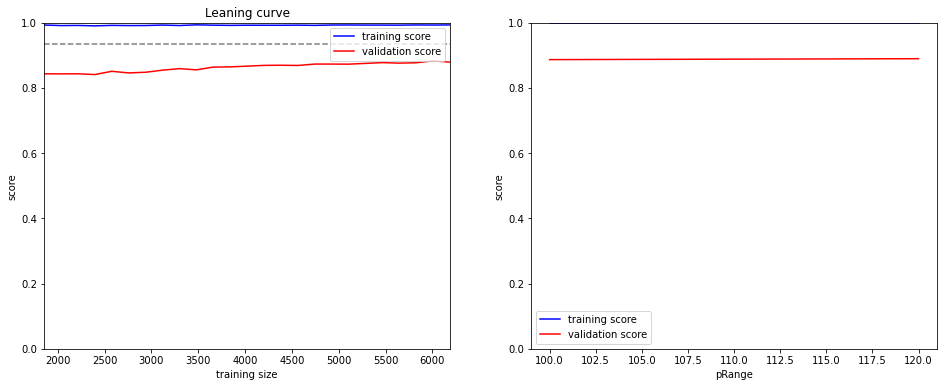

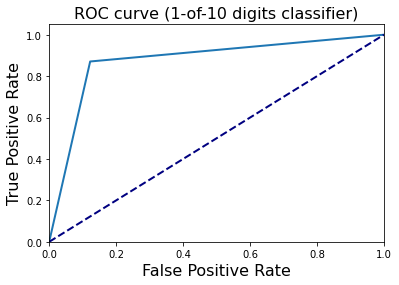

In [126]:
models('DummyClassifier-scaledSmote',DummyClassifier(strategy = 'most_frequent'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-scaledSmote',LogisticRegression(random_state=42,solver='liblinear',C=1,penalty='l1'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,LogisticRegression(),'C',[1,7])
models('knn-scaledSmote',KNeighborsClassifier(n_neighbors=2,metric='manhattan'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-scaledSmote',GaussianNB(var_smoothing=0.0657933224657568),x_train_copy,y_train_copy,x_test_copy,y_test_copy,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-scaledSmote',SVC(random_state=42,C=0.1,gamma=0.1,kernel='rbf'),x_train_copy,y_train_copy,x_test_copy,y_test_copy,SVC(),'degree',[3])
models('DecisionTree Classifier-scaledSmote',DecisionTreeClassifier(random_state=42,criterion = 'entropy', max_depth = 14, max_leaf_nodes = 94),x_train_copy,y_train_copy,x_test_copy,y_test_copy,DecisionTreeClassifier(),'max_depth',[5,10])
models('RandomForestClassifier-scaledSmote',RandomForestClassifier(random_state=4,criterion = 'gini', n_estimators= 10),x_train_copy,y_train_copy,x_test_copy,y_test_copy,RandomForestClassifier(random_state=0),'n_estimators',[100,120],results1)
models('AdaBoostClassifier-scaledSmote',AdaBoostClassifier(learning_rate = 0.1),x_train_copy,y_train_copy,x_test_copy,y_test_copy,AdaBoostClassifier(),'n_estimators',[50,100])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

DummyClassifier
score on train data with DummyClassifier  : 0.5
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.9491392801251957
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1213.0     0.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1213    0]
 [  65    0]]
logistic regression
score on train data with logistic regression  : 0.7870065789473685
---------------------------------------------------------------------------------------
score on test data with  logistic regression  : 0

In [ ]:
x_train_scaled_standard_percentile ,x_test_scaled_standard_percentile  = selectionFeature(SelectPercentile(percentile=50),x_train_scaled_standard_smote,y_train_res,x_test_scaled_standard_smote)

X_train.shape: (7296, 19)
X_train_selected.shape: (7296, 9)


In [ ]:
models('DummyClassifier',DummyClassifier(strategy = 'most_frequent'),x_train_scaled_standard_percentile ,y_train_res,x_test_scaled_standard_percentile ,y_test)
models('logistic regression',LogisticRegression(random_state=42,solver='liblinear',C=1,penalty='l1'),x_train_scaled_standard_percentile ,y_train_res,x_test_scaled_standard_percentile ,y_test)
models('knn',KNeighborsClassifier(n_neighbors=2,metric='manhattan'),x_train_scaled_standard_percentile ,y_train_res,x_test_scaled_standard_percentile ,y_test)
models('guassianNB',GaussianNB(var_smoothing=0.0657933224657568),x_train_scaled_standard_percentile ,y_train_res,x_test_scaled_standard_percentile ,y_test)
models('support vector machine',SVC(random_state=42,C=0.1,gamma=0.1,kernel='rbf'),x_train_scaled_standard_percentile ,y_train_res,x_test_scaled_standard_percentile ,y_test)
models('DecisionTree Classifier',DecisionTreeClassifier(random_state=42,criterion = 'entropy', max_depth = 14, max_leaf_nodes = 94),x_train_scaled_standard_percentile ,y_train_res,x_test_scaled_standard_percentile ,y_test)
models('RandomForestClassifier',RandomForestClassifier(random_state=4,criterion = 'gini', n_estimators= 10),x_train_scaled_standard_percentile ,y_train_res,x_test_scaled_standard_percentile ,y_test)
#models('AdaBoostClassifier',AdaBoostClassifier(eval_metric= 'error',learning_rate = 0.1),x_train_res,y_train_res,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

DummyClassifier
score on train data with DummyClassifier  : 0.5
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.9491392801251957
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1213.0     0.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1213    0]
 [  65    0]]
logistic regression
score on train data with logistic regression  : 0.7874177631578947
---------------------------------------------------------------------------------------
score on test data with  logistic regression  : 0

In [ ]:
x_train_scaled_robust_percentile ,x_test_scaled_robust_percentile  = selectionFeature(SelectPercentile(percentile=50),x_train_scaled_Robust_smote,y_train_res,x_test_scaled_Robust_smote)

X_train.shape: (7296, 19)
X_train_selected.shape: (7296, 9)


In [ ]:
models('DummyClassifier',DummyClassifier(strategy = 'most_frequent'),x_train_scaled_robust_percentile ,y_train_res,x_test_scaled_robust_percentile ,y_test)
models('logistic regression',LogisticRegression(random_state=42,solver='liblinear',C=1,penalty='l1'),x_train_scaled_robust_percentile ,y_train_res,x_test_scaled_robust_percentile ,y_test)
models('knn',KNeighborsClassifier(n_neighbors=10,metric='manhattan'),x_train_scaled_robust_percentile ,y_train_res,x_test_scaled_robust_percentile ,y_test)
models('guassianNB',GaussianNB(var_smoothing=0.0657933224657568),x_train_scaled_robust_percentile ,y_train_res,x_test_scaled_robust_percentile ,y_test)
models('support vector machine',SVC(random_state=42,C=0.1,gamma=0.1,kernel='rbf'),x_train_scaled_robust_percentile ,y_train_res,x_test_scaled_robust_percentile ,y_test)
models('DecisionTree Classifier',DecisionTreeClassifier(random_state=42,criterion = 'entropy', max_depth = 14, max_leaf_nodes = 94),x_train_scaled_robust_percentile ,y_train_res,x_test_scaled_robust_percentile ,y_test)
models('RandomForestClassifier',RandomForestClassifier(random_state=777,criterion = 'gini', n_estimators= 10),x_train_scaled_robust_percentile ,y_train_res,x_test_scaled_robust_percentile ,y_test)
#models('AdaBoostClassifier',AdaBoostClassifier(eval_metric= 'error',learning_rate = 0.1),x_train_res,y_train_res,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

DummyClassifier
score on train data with DummyClassifier  : 0.5
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.9491392801251957
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1213.0     0.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1213    0]
 [  65    0]]
logistic regression
score on train data with logistic regression  : 0.7874177631578947
---------------------------------------------------------------------------------------
score on test data with  logistic regression  : 0

In [ ]:
models('knn',KNeighborsClassifier(n_neighbors=10,metric='manhattan'),x_train_scaled_robust_percentile ,y_train_res,x_test_scaled_robust_percentile ,y_test)

knn
score on train data with knn  : 0.9432565789473685
---------------------------------------------------------------------------------------
score on test data with  knn  : 0.9107981220657277
---------------------------------------------------------------------------------------
preceision:  0.15492957746478872
---------------------------------------------------------------------------------------
recall:  0.16923076923076924
---------------------------------------------------------------------------------------
Most frequent class ( knn )

            Not one     One 
    Not one  1153.0    60.0 
        One    54.0    11.0 
---------------------------------------------------------------------------------------
classification report:
 [[1153   60]
 [  54   11]]


In [ ]:
def modelss(modelName , defintionTheModelAndHisParameter,x_train,y_train,x_test,y_test):
  classifier = defintionTheModelAndHisParameter.fit(x_train,y_train)
  y_predicted = classifier.predict(x_test)
  confusionMatrixForTheClassifier = confusion_matrix(y_test,y_predicted )
  precision = precision_score(y_test,y_predicted)
  recall = recall_score(y_test,y_predicted)
  scoreOnTest = classifier.score(x_test,y_test)
  scoreOnTrain =classifier.score(x_train,y_train)
  classificationReportForTheClassifier =classification_report(y_test, y_predicted)
  print(modelName)
  print("score on train data with", modelName," :", scoreOnTrain)
  print("---------------------------------------------------------------------------------------")
  print("score on test data with ", modelName," :",scoreOnTest)
  # print("---------------------------------------------------------------------------------------")
  # print("preceision: ", precision)
  # print("---------------------------------------------------------------------------------------")
  # print("recall: ",recall)
  # print("---------------------------------------------------------------------------------------")
  # print("Most frequent class (",modelName,")\n")
  # print_cm(confusionMatrixForTheClassifier, ['Not one', 'One'])
  # print("---------------------------------------------------------------------------------------")
  # print("classification report:\n",confusionMatrixForTheClassifier)

In [ ]:
for i in range (1,100):
  print('------------------------------------------------------------------------------------------------------------')
  print(i)
  modelss('RandomForestClassifier',RandomForestClassifier(random_state=777,criterion = 'gini', n_estimators= i),x_train_scaled_robust_percentile ,y_train_res,x_test_scaled_robust_percentile ,y_test)

------------------------------------------------------------------------------------------------------------
1
RandomForestClassifier
score on train data with RandomForestClassifier  : 0.9760142543859649
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier  : 0.8943661971830986
---------------------------------------------------------------------------------------
preceision:  0.07317073170731707
---------------------------------------------------------------------------------------
recall:  0.09230769230769231
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier )

            Not one     One 
    Not one  1137.0    76.0 
        One    59.0     6.0 
---------------------------------------------------------------------------------------
classification report:
 [[1137   76]
 [  59    6]]
--------------------------------------

In [100]:
results1= results

In [101]:
pd.set_option('display.max_rows', 100)

In [102]:
results1


Model Train_Score Test_Score Precision  \
0                    DummyClassifier-Smote    0.507265    0.49539       0.0   
1                logistic regression-Smote    0.769349   0.776194  0.762951   
2                                knn-Smote    0.947052   0.924979  0.870571   
3                         guassianNB-Smote     0.61302    0.61316  0.566873   
4             support vector machine-Smote    0.811819   0.805532  0.776119   
5            DecisionTree Classifier-Smote         1.0   0.974015  0.951027   
6                   RandomForestClassifier         1.0   0.987846   0.97648   
7                 AdaBoostClassifier-Smote    0.796452   0.802179  0.775188   
8                 DummyClassifier-pcaSmote    0.507265    0.49539       0.0   
9             logistic regression-pcaSmote    0.735541   0.729673  0.736264   
10                            knn-pcaSmote     0.94789   0.921626  0.865564   
11                     guassianNB-pcaSmote    0.679799   0.663453  0.708204   
12         support vector machine-pcaSmote    0.787231   0.766136   0.73997   
13        DecisionTree Classifier-pcaSmote         1.0   0.973596  0.950276   
14         RandomForestClassifier-pcaSmote         1.0   0.974434  0.951779   
15             AdaBoostClassifier-pcaSmote    0.783459   0.765717  0.767191   
16          DummyClassifier-pcaScalerSmote    0.507265    0.49539       0.0   
17      logistic regression-pcaScalerSmote    0.736519   0.722967   0.71599   
18                      knn-pcaScalerSmote    0.945376   0.916178   0.85755   
19               guassianNB-pcaScalerSmote    0.668343   0.660939  0.621091   
20   support vector machine-pcaScalerSmote     0.78751   0.771584  0.748679   
21  DecisionTree Classifier-pcaScalerSmote         1.0   0.966471  0.937695   
22   RandomForestClassifier-pcaScalerSmote         1.0   0.984912  0.970968   
23       AdaBoostClassifier-pcaScalerSmote    0.781224   0.773261  0.758379   
24             DummyClassifier-scaledSmote    0.507265    0.49539       0.0   
25         logistic regression-scaledSmote    0.770327   0.776194  0.762951   
26                         knn-scaledSmote    0.945655   0.926236  0.872464   
27                  guassianNB-scaledSmote    0.576558   0.573345   0.54235   
28      support vector machine-scaledSmote    0.844649   0.831098  0.799551   
29     DecisionTree Classifier-scaledSmote         1.0   0.973177  0.949527   
30      RandomForestClassifier-scaledSmote         1.0   0.987846   0.97648   
31          AdaBoostClassifier-scaledSmote    0.796452   0.802179  0.775188   
32             DummyClassifier-minmaxSmote    0.507265    0.49539       0.0   
33         logistic regression-minmaxSmote    0.769349   0.776194  0.762951   
34                         knn-minmaxSmote    0.947052    0.92456  0.869942   
35                  guassianNB-minmaxSmote     0.61302    0.61316  0.566873   
36      support vector machine-minmaxSmote    0.811679   0.805532  0.776119   
37     DecisionTree Classifier-minmaxSmote         1.0   0.974015  0.951027   
38      RandomForestClassifier-minmaxSmote         1.0   0.987846   0.97648   
39          AdaBoostClassifier-minmaxSmote    0.796452   0.802179  0.775188   
40            DummyClassifier-scaledspCopy    0.507265    0.49539       0.0   
41        logistic regression-scaledspCopy    0.767533    0.76907  0.757289   
42                        knn-scaledspCopy    0.949148   0.923722  0.868687   
43                 guassianNB-scaledspCopy    0.733026   0.724225  0.683221   
44     support vector machine-scaledspCopy    0.793099   0.792121  0.775272   
45    DecisionTree Classifier-scaledspCopy         1.0    0.97653  0.955556   
46     RandomForestClassifier-scaledspCopy         1.0   0.976949  0.956315   
47         AdaBoostClassifier-scaledspCopy    0.789606   0.795474  0.763235   
48                   DummyClassifier-Smote    0.502563   0.492314       0.0   
49               logistic regression-Smote    0.786258   0.773577  0.753938   
50      

In [103]:
resultsCopy = results1.loc[1:47]

In [104]:
resultsSmote = results1.loc[48:71]

In [105]:
resultsCopy['Model'] = resultsCopy['Model'].str.replace('Smote','Copy')

In [116]:
resultsCopy.loc[1:7]

Model Train_Score Test_Score Precision    Recall  \
1      logistic regression-Copy    0.769349   0.776194  0.762951  0.807309   
2                      knn-Copy    0.947052   0.924979  0.870571       1.0   
3               guassianNB-Copy     0.61302    0.61316  0.566873  0.989203   
4   support vector machine-Copy    0.811819   0.805532  0.776119  0.863787   
5  DecisionTree Classifier-Copy         1.0   0.974015  0.951027       1.0   
6        RandomForestClassifier         1.0   0.987846   0.97648       1.0   
7       AdaBoostClassifier-Copy    0.796452   0.802179  0.775188  0.856312   

        Auc        F1  
1  0.775905  0.784504  
2  0.924281  0.930808  
3  0.609661  0.720726  
4   0.80499   0.81761  
5  0.973773  0.974899  
6  0.987733    0.9881  
7  0.801676  0.813733

In [117]:
resultsCopy.loc[8:15]

Model Train_Score Test_Score Precision  \
8           DummyClassifier-pcaCopy    0.507265    0.49539       0.0   
9       logistic regression-pcaCopy    0.735541   0.729673  0.736264   
10                      knn-pcaCopy     0.94789   0.921626  0.865564   
11               guassianNB-pcaCopy    0.679799   0.663453  0.708204   
12   support vector machine-pcaCopy    0.787231   0.766136   0.73997   
13  DecisionTree Classifier-pcaCopy         1.0   0.973596  0.950276   
14   RandomForestClassifier-pcaCopy         1.0   0.974434  0.951779   
15       AdaBoostClassifier-pcaCopy    0.783459   0.765717  0.767191   

      Recall       Auc        F1  
8        0.0       0.5       0.0  
9   0.723422  0.729731  0.729786  
10       1.0  0.920897  0.927938  
11  0.566445  0.664356  0.629442  
12  0.827243  0.765567  0.781176  
13       1.0   0.97335  0.974504  
14       1.0  0.974196  0.975294  
15  0.769103  0.765685  0.768146

In [118]:
resultsCopy.loc[16:23]

Model Train_Score Test_Score Precision  \
16          DummyClassifier-pcaScalerCopy    0.507265    0.49539       0.0   
17      logistic regression-pcaScalerCopy    0.736519   0.722967   0.71599   
18                      knn-pcaScalerCopy    0.945376   0.916178   0.85755   
19               guassianNB-pcaScalerCopy    0.668343   0.660939  0.621091   
20   support vector machine-pcaScalerCopy     0.78751   0.771584  0.748679   
21  DecisionTree Classifier-pcaScalerCopy         1.0   0.966471  0.937695   
22   RandomForestClassifier-pcaScalerCopy         1.0   0.984912  0.970968   
23       AdaBoostClassifier-pcaScalerCopy    0.781224   0.773261  0.758379   

      Recall       Auc        F1  
16       0.0       0.5       0.0  
17  0.747508  0.722739   0.73141  
18       1.0  0.915398  0.923313  
19  0.841362   0.65926  0.714638  
20   0.82392  0.771097    0.7845  
21       1.0  0.966159  0.967846  
22       1.0  0.984772   0.98527  
23   0.80814  0.772936  0.782469

In [119]:
resultsCopy.loc[24:31]

Model Train_Score Test_Score Precision  \
24          DummyClassifier-scaledCopy    0.507265    0.49539       0.0   
25      logistic regression-scaledCopy    0.770327   0.776194  0.762951   
26                      knn-scaledCopy    0.945655   0.926236  0.872464   
27               guassianNB-scaledCopy    0.576558   0.573345   0.54235   
28   support vector machine-scaledCopy    0.844649   0.831098  0.799551   
29  DecisionTree Classifier-scaledCopy         1.0   0.973177  0.949527   
30   RandomForestClassifier-scaledCopy         1.0   0.987846   0.97648   
31       AdaBoostClassifier-scaledCopy    0.796452   0.802179  0.775188   

      Recall       Auc        F1  
24       0.0       0.5       0.0  
25  0.807309  0.775905  0.784504  
26       1.0   0.92555  0.931889  
27  0.989203  0.569474  0.700588  
28  0.887874   0.83057  0.841401  
29       1.0  0.972927   0.97411  
30       1.0  0.987733    0.9881  
31  0.856312  0.801676  0.813733

In [120]:
resultsCopy.loc[31:38]

Model Train_Score Test_Score Precision  \
31       AdaBoostClassifier-scaledCopy    0.796452   0.802179  0.775188   
32          DummyClassifier-minmaxCopy    0.507265    0.49539       0.0   
33      logistic regression-minmaxCopy    0.769349   0.776194  0.762951   
34                      knn-minmaxCopy    0.947052    0.92456  0.869942   
35               guassianNB-minmaxCopy     0.61302    0.61316  0.566873   
36   support vector machine-minmaxCopy    0.811679   0.805532  0.776119   
37  DecisionTree Classifier-minmaxCopy         1.0   0.974015  0.951027   
38   RandomForestClassifier-minmaxCopy         1.0   0.987846   0.97648   

      Recall       Auc        F1  
31  0.856312  0.801676  0.813733  
32       0.0       0.5       0.0  
33  0.807309  0.775905  0.784504  
34       1.0  0.923858  0.930448  
35  0.989203  0.609661  0.720726  
36  0.863787   0.80499   0.81761  
37       1.0  0.973773  0.974899  
38       1.0  0.987733    0.9881

In [121]:
resultsCopy.loc[39:]

Model Train_Score Test_Score Precision  \
39         AdaBoostClassifier-minmaxCopy    0.796452   0.802179  0.775188   
40          DummyClassifier-scaledspCopy    0.507265    0.49539       0.0   
41      logistic regression-scaledspCopy    0.767533    0.76907  0.757289   
42                      knn-scaledspCopy    0.949148   0.923722  0.868687   
43               guassianNB-scaledspCopy    0.733026   0.724225  0.683221   
44   support vector machine-scaledspCopy    0.793099   0.792121  0.775272   
45  DecisionTree Classifier-scaledspCopy         1.0    0.97653  0.955556   
46   RandomForestClassifier-scaledspCopy         1.0   0.976949  0.956315   
47       AdaBoostClassifier-scaledspCopy    0.789606   0.795474  0.763235   

      Recall       Auc        F1  
39  0.856312  0.801676  0.813733  
40       0.0       0.5       0.0  
41  0.798173  0.768799  0.777194  
42       1.0  0.923012   0.92973  
43  0.845515  0.723096  0.755754  
44  0.828073  0.791786  0.800803  
45       1.0  0.976311  0.977273  
46       1.0  0.976734   0.97767  
47  0.862126  0.794853  0.809672

In [ ]:
#SMOTE RESULTS

In [122]:
resultsSmote.loc[48:55]

Model Train_Score Test_Score Precision    Recall  \
48          DummyClassifier-Smote    0.502563   0.492314       0.0       0.0   
49      logistic regression-Smote    0.786258   0.773577  0.753938  0.822422   
50                      knn-Smote     0.92963   0.886996  0.838319  0.963175   
51               guassianNB-Smote    0.643164   0.646448  0.590092  0.994272   
52   support vector machine-Smote    0.856074   0.846282  0.807359  0.915712   
53  DecisionTree Classifier-Smote         1.0   0.869132  0.867802  0.875614   
54   RandomForestClassifier-Smote         1.0   0.933112   0.91413  0.958265   
55       AdaBoostClassifier-Smote    0.834742   0.823847  0.794682  0.880524   

         Auc        F1  
48       0.5       0.0  
49  0.772815  0.786693  
50  0.885807   0.89642  
51  0.641018  0.740628  
52  0.845198  0.858129  
53  0.869031   0.87169  
54  0.932719  0.935677  
55  0.822962  0.835404

In [124]:
resultsSmote.loc[56:63]

Model Train_Score Test_Score Precision  \
56          DummyClassifier-scaledSmote    0.502563   0.492314       0.0   
57      logistic regression-scaledSmote     0.78612   0.774823  0.756024   
58                      knn-scaledSmote    0.926029   0.891982  0.837781   
59               guassianNB-scaledSmote    0.626541   0.631076    0.5796   
60   support vector machine-scaledSmote    0.878654   0.862484  0.822126   
61  DecisionTree Classifier-scaledSmote         1.0   0.869132  0.867802   
62   RandomForestClassifier-scaledSmote         1.0   0.932281  0.913349   
63       AdaBoostClassifier-scaledSmote    0.834742   0.823847  0.794682   

      Recall       Auc        F1  
56       0.0       0.5       0.0  
57  0.821604  0.774093  0.787451  
58  0.976268  0.890666  0.901738  
59   0.99509  0.625393   0.73253  
60  0.930442  0.861423  0.872937  
61  0.875614  0.869031   0.87169  
62  0.957447  0.931888  0.934878  
63  0.880524  0.822962  0.835404

In [125]:
resultsSmote.loc[64:71]

Model Train_Score Test_Score Precision  \
64          DummyClassifier-scaledSmote    0.502563   0.492314       0.0   
65      logistic regression-scaledSmote    0.783488   0.773577  0.755472   
66                      knn-scaledSmote    0.936418   0.827586  0.879586   
67               guassianNB-scaledSmote    0.736252   0.728708  0.675943   
68   support vector machine-scaledSmote    0.783627   0.773162  0.727151   
69  DecisionTree Classifier-scaledSmote    0.889597    0.87204  0.841045   
70   RandomForestClassifier-scaledSmote    0.993212   0.874117  0.880066   
71       AdaBoostClassifier-scaledSmote    0.800111   0.783133   0.74858   

      Recall       Auc        F1  
64       0.0       0.5       0.0  
65  0.819149  0.772866  0.786023  
66  0.765139  0.828561  0.818381  
67  0.894435  0.726121  0.769989  
68  0.885434  0.771409  0.798524  
69  0.922259  0.871256  0.879781  
70  0.870704   0.87417   0.87536  
71   0.86252  0.781893  0.801521